# FIFA 21 - CASE STUDY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from sklearn import linear_model

In [2]:
data = pd.read_csv('fifa21_train.csv')
pd.set_option("display.max_columns", None)
display(data)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,Left,5,"Feb 8, 2018",NaN,€625K,€3K,€891K,2018 ~ 2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3 ★,2★,Medium

# Data Cleaning

In [3]:
data.sort_values(by="OVA", ascending=False, inplace=True)
data.head(5)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,93
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,92
2219,188545,R. Lewandowski,31,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",NaN,€80M,€240K,€132M,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,91
4782,190871,Neymar Jr,28,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,91
9219,192985,K. De Bruyne,29,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,91


In [4]:
data[['Feet', 'Inches']] = data['Height'].str.extract(r"(\d+)\'(\d+)\"")

data['Feet'] = pd.to_numeric(data['Feet'])
data['Inches'] = pd.to_numeric(data['Inches'])

display(data[['Name', 'Height', 'Feet', 'Inches']])

,Name,Height,Feet,Inches
5291,L. Messi,"5'7""",5,7
8048,Cristiano Ronaldo,"6'2""",6,2
2219,R. Lewandowski,"6'0""",6,0
4782,Neymar Jr,"5'9""",5,9
9219,K. De Bruyne,"5'11""",5,11
...,...,...,...,...
8049,Zhou Xiao,"6'2""",6,2
7508,R. McKinley,"5'10""",5,10
11392,A. Dunbar,"6'0""",6,0
1925,D. Stadelmann,"5'11""",5,11


In [5]:
data['Height_in_cm'] = data['Feet'] * 30.48 + data['Inches'] * 2.54
display(data[['Name', 'Height', 'Feet', 'Inches' , 'Height_in_cm']])

,Name,Height,Feet,Inches,Height_in_cm
5291,L. Messi,"5'7""",5,7,170.18
8048,Cristiano Ronaldo,"6'2""",6,2,187.96
2219,R. Lewandowski,"6'0""",6,0,182.88
4782,Neymar Jr,"5'9""",5,9,175.26
9219,K. De Bruyne,"5'11""",5,11,180.34
...,...,...,...,...,...
8049,Zhou Xiao,"6'2""",6,2,187.96
7508,R. McKinley,"5'10""",5,10,177.80
11392,A. Dunbar,"6'0""",6,0,182.88
1925,D. Stadelmann,"5'11""",5,11,180.34


In [6]:
data.sort_values(by="OVA", ascending=False, inplace=True)
data.head(5)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Feet,Inches,Height_in_cm
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,93,5,7,170.18
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,92,6,2,187.96
2219,188545,R. Lewandowski,31,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",NaN,€80M,€240K,€132M,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,91,6,0,182.88
4782,190871,Neymar Jr,28,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,91,5,9,175.26
9219,192985,K. De Bruyne,29,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,91,5,11,180.34


In [7]:
data['Weight'] = data['Weight'].str.replace('lbs','')
data['Weight'] = pd.to_numeric(data['Weight'] , errors='coerce')
data.head(2)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Feet,Inches,Height_in_cm
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",159,Left,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,93,5,7,170.18
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",183,Right,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,92,6,2,187.96


In [8]:
data = data.rename(columns = {"Weight":"Weight(kg)"})
data.head(2)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight(kg),foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Feet,Inches,Height_in_cm
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",159,Left,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,93,5,7,170.18
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",183,Right,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,92,6,2,187.96


In [9]:
data['Weight(kg)'] = data['Weight(kg)'] * 0.45
data.head(2)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight(kg),foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Feet,Inches,Height_in_cm
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",71.55,Left,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,93,5,7,170.18
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",82.35,Right,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,92,6,2,187.96


In [10]:
data['Value'] = data['Value'].str.replace('€','')
data.head(2)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight(kg),foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Feet,Inches,Height_in_cm
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",71.55,Left,0,"Jul 1, 2004",NaN,67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,93,5,7,170.18
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",82.35,Right,0,"Jul 10, 2018",NaN,46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,92,6,2,187.96


In [11]:
data['Wage'] = data['Wage'].str.replace('€','')
data.head(2)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight(kg),foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Feet,Inches,Height_in_cm
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",71.55,Left,0,"Jul 1, 2004",NaN,67.5M,560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,93,5,7,170.18
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",82.35,Right,0,"Jul 10, 2018",NaN,46M,220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,92,6,2,187.96


In [12]:
data['Release Clause'] = data['Release Clause'].str.replace('€','')
data.head(2)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight(kg),foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Feet,Inches,Height_in_cm
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",71.55,Left,0,"Jul 1, 2004",NaN,67.5M,560K,138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,93,5,7,170.18
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",82.35,Right,0,"Jul 10, 2018",NaN,46M,220K,75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,92,6,2,187.96


In [13]:
def convert_value(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)

data['Value'] = data['Value'].apply(convert_value)
data['Wage'] = data['Wage'].apply(convert_value)
data['Release Clause'] = data['Release Clause'].apply(convert_value)
data.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight(kg),foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Feet,Inches,Height_in_cm
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",71.55,Left,0,"Jul 1, 2004",NaN,67500000.0,560000.0,138400000.0,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,93,5,7,170.18
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",82.35,Right,0,"Jul 10, 2018",NaN,46000000.0,220000.0,75900000.0,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,92,6,2,187.96
2219,188545,R. Lewandowski,31,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,"6'0""",79.20,Right,0,"Jul 1, 2014",NaN,80000000.0,240000.0,132000000.0,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,91,6,0,182.88
4782,190871,Neymar Jr,28,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,"5'9""",67.50,Right,0,"Aug 3, 2017",NaN,90000000.0,270000.0,166500000.0,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,91,5,9,175.26
9219,192985,K. De Bruyne,29,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,"5'11""",69.30,Right,0,"Aug 30, 2015",NaN,87000000.0,370000.0,161000000.0,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,91,5,11,180.34


In [14]:
data['W/F'] = data['W/F'].str.replace('★','')
data['IR'] = data['IR'].str.replace('★','')
data['SM'] = data['SM'].str.replace('★','')
data.head(2)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight(kg),foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Feet,Inches,Height_in_cm
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",71.55,Left,0,"Jul 1, 2004",NaN,67500000.0,560000.0,138400000.0,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,93,5,7,170.18
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",82.35,Right,0,"Jul 10, 2018",NaN,46000000.0,220000.0,75900000.0,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,92,6,2,187.96


In [15]:
data.columns.get_indexer(['LS', 'GK'])

array([73, 99])

In [16]:
for index in range(73, 100):
    column_name = data.columns[index]
    data[column_name] = data[column_name].astype(str)
    
    values = []
    for i, value in enumerate(data[column_name]):
        value = str(value)
        ans = 0
        if '+' in value:
            split_vals = value.split('+')
            total_sum = int(split_vals[0]) + int(split_vals[1])
            ans = int(total_sum)
        
        elif '-' in value:
            split_vals = value.split('-')
            total_diff = int(split_vals[0]) - int(split_vals[1])
            ans = int(total_diff)
        else:
            ans = int(value)
        values.append(ans)
    data[column_name] = values

data.head(5)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight(kg),foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Feet,Inches,Height_in_cm
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",71.55,Left,0,"Jul 1, 2004",NaN,67500000.0,560000.0,138400000.0,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,830,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,68,68,68,69,65,55,55,55,65,22,93,5,7,170.18
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",82.35,Right,0,"Jul 10, 2018",NaN,46000000.0,220000.0,75900000.0,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,750,92,92,92,89,91,91,91,89,91,91,91,91,84,84,84,91,68,64,64,64,68,64,57,57,57,64,23,92,6,2,187.96
2219,188545,R. Lewandowski,31,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,"6'0""",79.20,Right,0,"Jul 1, 2014",NaN,80000000.0,240000.0,132000000.0,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4,4,High,Medium,4,78,91,78,85,43,82,487,91,91,91,85,87,87,87,85,88,88,88,86,82,82,82,86,67,68,68,68,67,64,63,63,63,64,22,91,6,0,182.88
4782,190871,Neymar Jr,28,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,"5'9""",67.50,Right,0,"Aug 3, 2017",NaN,90000000.0,270000.0,166500000.0,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,546,87,87,87,90,89,89,89,90,91,91,91,91,86,86,86,91,70,65,65,65,70,65,52,52,52,65,23,91,5,9,175.26
9219,192985,K. De Bruyne,29,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,"5'11""",69.30,Right,0,"Aug 30, 2015",NaN,87000000.0,370000.0,161000000.0,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,406,86,86,86,88,88,88,88,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24,91,5,11,180.34


In [17]:
data[['Contract Start', 'Contract End']] = data['Contract'].str.extract(r"(\d+) ~ (\d+)")

data['Contract Start'] = pd.to_numeric(data['Contract Start'])
data['Contract End'] = pd.to_numeric(data['Contract End'])

display(data[['Name', 'Contract', 'Contract Start', 'Contract End']])

,Name,Contract,Contract Start,Contract End
5291,L. Messi,2004 ~ 2021,2004.0,2021.0
8048,Cristiano Ronaldo,2018 ~ 2022,2018.0,2022.0
2219,R. Lewandowski,2014 ~ 2023,2014.0,2023.0
4782,Neymar Jr,2017 ~ 2022,2017.0,2022.0
9219,K. De Bruyne,2015 ~ 2023,2015.0,2023.0
...,...,...,...,...
8671,Song Yue,2020 ~ 2022,2020.0,2022.0
8351,M. Flores,2020 ~ 2024,2020.0,2024.0
11392,A. Dunbar,2016 ~ 2020,2016.0,2020.0
1925,D. Stadelmann,2007,NaN,NaN


In [18]:
data[['Contract Start', 'Contract End']] = data[['Contract Start', 'Contract End']].round(decimals = 0)
data.head(2)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight(kg),foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Feet,Inches,Height_in_cm,Contract Start,Contract End
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",71.55,Left,0,"Jul 1, 2004",NaN,67500000.0,560000.0,138400000.0,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,830,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,68,68,68,69,65,55,55,55,65,22,93,5,7,170.18,2004.0,2021.0
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",82.35,Right,0,"Jul 10, 2018",NaN,46000000.0,220000.0,75900000.0,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,750,92,92,92,89,91,91,91,89,91,91,91,91,84,84,84,91,68,64,64,64,68,64,57,57,57,64,23,92,6,2,187.96,2018.0,2022.0


In [19]:
removed_columns = ['Feet', 'Height', 'Inches', 'Contract', 'Team & Contract']
data.drop(columns=removed_columns, inplace=True)
data.head(2)

,ID,Name,Age,Nationality,Club,BP,Position,Weight(kg),foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Height_in_cm,Contract Start,Contract End
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,71.55,Left,0,"Jul 1, 2004",NaN,67500000.0,560000.0,138400000.0,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,830,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,68,68,68,69,65,55,55,55,65,22,93,170.18,2004.0,2021.0
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,82.35,Right,0,"Jul 10, 2018",NaN,46000000.0,220000.0,75900000.0,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,750,92,92,92,89,91,91,91,89,91,91,91,91,84,84,84,91,68,64,64,64,68,64,57,57,57,64,23,92,187.96,2018.0,2022.0


In [20]:
data = data.rename(columns = {"foot":"Foot"})
data.head(2)

,ID,Name,Age,Nationality,Club,BP,Position,Weight(kg),Foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Height_in_cm,Contract Start,Contract End
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,71.55,Left,0,"Jul 1, 2004",NaN,67500000.0,560000.0,138400000.0,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,830,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,68,68,68,69,65,55,55,55,65,22,93,170.18,2004.0,2021.0
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,82.35,Right,0,"Jul 10, 2018",NaN,46000000.0,220000.0,75900000.0,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,750,92,92,92,89,91,91,91,89,91,91,91,91,84,84,84,91,68,64,64,64,68,64,57,57,57,64,23,92,187.96,2018.0,2022.0


In [21]:
data.isna().sum()

ID                  0
Name                0
Age                 0
Nationality         0
Club               18
                 ... 
GK                  0
OVA                 0
Height_in_cm        0
Contract Start    909
Contract End      909
Length: 101, dtype: int64

In [22]:
numerical_columns = data.select_dtypes(include='number').columns
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
display(data)

,ID,Name,Age,Nationality,Club,BP,Position,Weight(kg),Foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Height_in_cm,Contract Start,Contract End
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,71.55,Left,0,"Jul 1, 2004",NaN,67500000.0,560000.0,138400000.0,429,85,95,70,91,88.000000,470,96,93.000000,94,91,96,451,91,80,91.000000,94,95.000000,389,86,68.000000,72,69,94,347,44,40.0,93.0,95.000000,75,96.000000,91,32,35,24.000000,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,830,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,68,68,68,69,65,55,55,55,65,22,93,170.18,2004.000000,2021.000000
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,82.35,Right,0,"Jul 10, 2018",NaN,46000000.0,220000.0,75900000.0,437,84,95,90,82,86.000000,414,88,81.000000,76,77,92,431,87,91,87.000000,95,71.000000,444,94,95.000000,84,78,93,353,63,29.0,95.0,82.000000,84,95.000000,84,28,32,24.000000,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,750,92,92,92,89,91,91,91,89,91,91,91,91,84,84,84,91,68,64,64,64,68,64,57,57,57,64,23,92,187.96,2018.000000,2022.000000
2219,188545,R. Lewandowski,31,Poland,FC Bayern München,ST,ST,79.20,Right,0,"Jul 1, 2014",NaN,80000000.0,240000.0,132000000.0,423,71,94,85,84,89.000000,407,85,79.000000,85,70,88,407,77,78,77.000000,93,82.000000,420,89,84.000000,76,86,85,391,81,49.0,94.0,79.000000,88,88.000000,96,35,42,19.000000,51,15,6,12,8,10,2195,457,4,4,High,Medium,4,78,91,78,85,43,82,487,91,91,91,85,87,87,87,85,88,88,88,86,82,82,82,86,67,68,68,68,67,64,63,63,63,64,22,91,182.88,2014.000000,2023.000000
4782,190871,Neymar Jr,28,Brazil,Paris Saint-Germain,LW,LW CAM,67.50,Right,0,"Aug 3, 2017",NaN,90000000.0,270000.0,166500000.0,408,85,87,62,87,87.000000,448,95,88.000000,89,81,95,453,94,89,96.000000,91,83.000000,357,80,62.000000,81,50,84,356,51,36.0,87.0,90.000000,92,93.000000,94,35,30,29.000000,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,546,87,87,87,90,89,89,89,90,91,91,91,91,86,86,86,91,70,65,65,65,70,65,52,52,52,65,23,91,175.26,2017.000000,2022.000000
9219,192985,K. De Bruyne,29,Belgium,Manchester City,CAM,CAM CM,69.30,Right,0,"Aug 30, 2015",NaN,87000000.0,370000.0,161000000.0,407,94,82,55,94,82.000000,441,88,85.000000,83,93,92,398,77,76,78.000000,91,76.000000,408,91,63.000000,89,74,91,408,76,66.0,88.0,94.000000,84,91.000000,186,68,65,53.000000,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,406,86,86,86,88,88,88,88,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24,91,180.34,2015.000000,2023.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671,257936,Song Yue,28,China PR,Tianjin TEDA FC,RM,CM,78.30,Right,0,"Aug 1, 2020",NaN,30000.0,2000.0,47000.0,211,44,32,44,56,35.000000,215,46,37.000000,33,56,43,286,67,64,56.000000,44,55.000000,258,49,59.000000,54,62,34,220,57,35.0,48.0,44.000000,36,35.000000,126,38,43,45.000000,36,8,5,11,5,7,1352,296,2,2,Low,Low,1,65,37,49,46,40,59,15,47,47,47,47,46,46,46,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,13,47,185.42,2020.000000,2022.000000
8351,25595

In [23]:
columns_with_missing = ['Club', 'Position', 'Joined', 'Loan Date End']
fill_values = {col: data[col].mode().iloc[0] if not data[col].mode().empty else None for col in columns_with_missing}
data.fillna(value=fill_values, inplace=True)
display(data)

,ID,Name,Age,Nationality,Club,BP,Position,Weight(kg),Foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Height_in_cm,Contract Start,Contract End
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,71.55,Left,0,"Jul 1, 2004","Jun 30, 2021",67500000.0,560000.0,138400000.0,429,85,95,70,91,88.000000,470,96,93.000000,94,91,96,451,91,80,91.000000,94,95.000000,389,86,68.000000,72,69,94,347,44,40.0,93.0,95.000000,75,96.000000,91,32,35,24.000000,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,830,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,68,68,68,69,65,55,55,55,65,22,93,170.18,2004.000000,2021.000000
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,82.35,Right,0,"Jul 10, 2018","Jun 30, 2021",46000000.0,220000.0,75900000.0,437,84,95,90,82,86.000000,414,88,81.000000,76,77,92,431,87,91,87.000000,95,71.000000,444,94,95.000000,84,78,93,353,63,29.0,95.0,82.000000,84,95.000000,84,28,32,24.000000,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,750,92,92,92,89,91,91,91,89,91,91,91,91,84,84,84,91,68,64,64,64,68,64,57,57,57,64,23,92,187.96,2018.000000,2022.000000
2219,188545,R. Lewandowski,31,Poland,FC Bayern München,ST,ST,79.20,Right,0,"Jul 1, 2014","Jun 30, 2021",80000000.0,240000.0,132000000.0,423,71,94,85,84,89.000000,407,85,79.000000,85,70,88,407,77,78,77.000000,93,82.000000,420,89,84.000000,76,86,85,391,81,49.0,94.0,79.000000,88,88.000000,96,35,42,19.000000,51,15,6,12,8,10,2195,457,4,4,High,Medium,4,78,91,78,85,43,82,487,91,91,91,85,87,87,87,85,88,88,88,86,82,82,82,86,67,68,68,68,67,64,63,63,63,64,22,91,182.88,2014.000000,2023.000000
4782,190871,Neymar Jr,28,Brazil,Paris Saint-Germain,LW,LW CAM,67.50,Right,0,"Aug 3, 2017","Jun 30, 2021",90000000.0,270000.0,166500000.0,408,85,87,62,87,87.000000,448,95,88.000000,89,81,95,453,94,89,96.000000,91,83.000000,357,80,62.000000,81,50,84,356,51,36.0,87.0,90.000000,92,93.000000,94,35,30,29.000000,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,546,87,87,87,90,89,89,89,90,91,91,91,91,86,86,86,91,70,65,65,65,70,65,52,52,52,65,23,91,175.26,2017.000000,2022.000000
9219,192985,K. De Bruyne,29,Belgium,Manchester City,CAM,CAM CM,69.30,Right,0,"Aug 30, 2015","Jun 30, 2021",87000000.0,370000.0,161000000.0,407,94,82,55,94,82.000000,441,88,85.000000,83,93,92,398,77,76,78.000000,91,76.000000,408,91,63.000000,89,74,91,408,76,66.0,88.0,94.000000,84,91.000000,186,68,65,53.000000,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,406,86,86,86,88,88,88,88,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24,91,180.34,2015.000000,2023.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671,257936,Song Yue,28,China PR,Tianjin TEDA FC,RM,CM,78.30,Right,0,"Aug 1, 2020","Jun 30, 2021",30000.0,2000.0,47000.0,211,44,32,44,56,35.000000,215,46,37.000000,33,56,43,286,67,64,56.000000,44,55.000000,258,49,59.000000,54,62,34,220,57,35.0,48.0,44.000000,36,35.000000,126,38,43,45.000000,36,8,5,11,5,7,1352,296,2,2,Low,Low,1,65,37,49,46,40,59,15,47,47,47,47,46,46,46,47,47,47,47,47,47,47,47,47,47,47,47,47

# Data Processing

In [24]:
data.describe()

,ID,Age,Weight(kg),Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Height_in_cm,Contract Start,Contract End
count,11701.000000,11701.00000,11701.000000,11701.000000,1.170100e+04,11701.000000,1.170100e+04,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
mean,219436.649004,25.27049,74.512093,5.534655,2.543772e+06,10434.834630,4.526818e+06,258.482181,51.593795,48.048116,53.494060,60.436800,45.067324,266.497222,57.852491,49.617839,44.358260,54.214683,60.627810,322.617383,65.432527,65.446628,64.582075,62.899838,64.709348,302.083326,59.726348,65.036621,63.214939,65.17084,49.162465,261.704982,56.939065,46.815119,52.48589,55.439194,50.279378,59.947732,140.674558,46.964875,48.042560,45.827702,77.726946,15.604906,15.517734,15.494402,15.543458,15.768310,1629.786599,361.106316,68.095206,55.046406,58.893257,64.223229,50.030254,64.817964,58.266815,58.266815,58.266815,57.486711,57.387574,57.387574,57.387574,57.486711,59.455688,59.455688,59.455688,59.903342,58.566789,58.566789,58.566789,59.903342,56.959662,56.515170,56.515170,56.515170,56.959662,56.173319,54.881634,54.881634,54.881634,56.173319,22.667977,66.921972,181.225234,2017.899926,2021.704503
std,37480.006004,4.95764,7.122727,5.810903,5.267533e+06,21216.019481,1.012383e+07,72.267012,17.872747,19.399617,16.956195,13.971811,17.701804,76.835287,18.050938,18.148526,17.484142,14.886875,15.886688,55.330054,14.735329,14.516404,14.458950,9.020199,14.106536,49.697749,13.511767,11.996044,15.350014,12.76541,19.058991,62.935298,17.066535,20.801928,19.06376,13.671268,15.713965,11.628692,61.599006,20.190466,21.470841,21.179854,81.221525,16.850815,16.155245,16.005114,16.409881,17.151738,260.766470,40.318331,11.247282,13.851853,10.174939,9.818311,16.841283,9.757873,12.949623,12.949623,12.949623,14.040032,13.682846,13.682846,13.682846,14.040032,13.411452,13.411452,13.411452,13.401485,12.666758,12.666758,12.666758,13.401485,13.219660,13.409094,13.409094,13.409094,13.219660,13.534768,14.412883,14.412883,14.412883,13.534768,14.524695,6.876081,6.913566,2.356840,1.632644
min,27.000000,16.00000,52.650000,-1.000000,0.000000e+00,0.000000,0.000000e+00,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,13.000000,11.000000,14.000000,24.000000,17.000000,133.000000,12.000000,25.000000,12.000000,20.00000,4.000000,55.000000,9.000000,5.000000,2.00000,10.000000,8.000000,12.000000,17.000000,3.000000,6.000000,6.000000,12.000000,

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


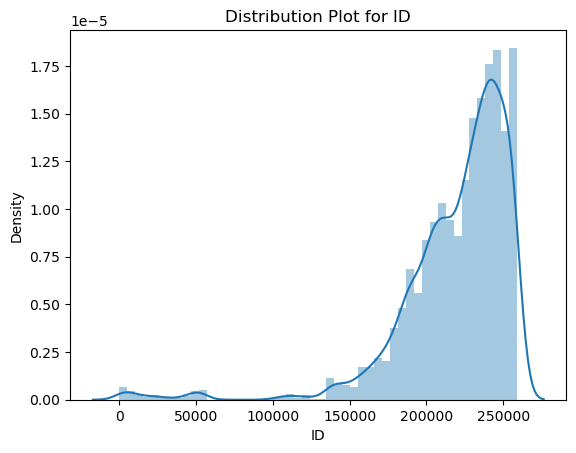

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


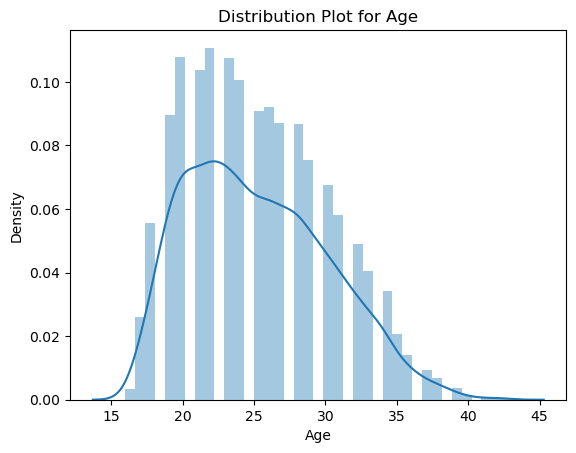

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


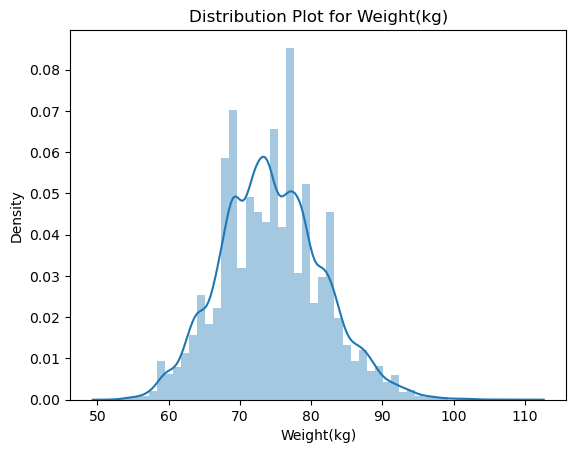

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


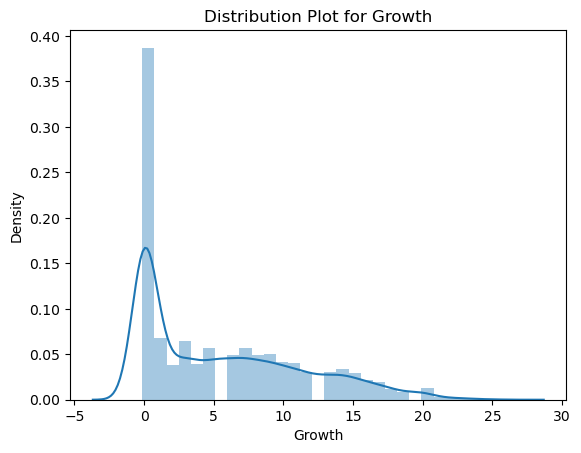

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


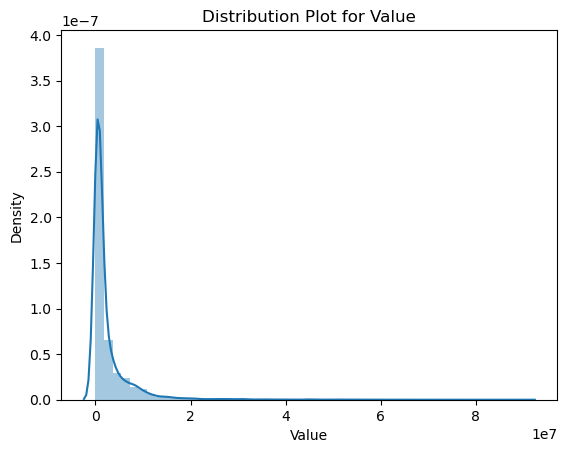

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


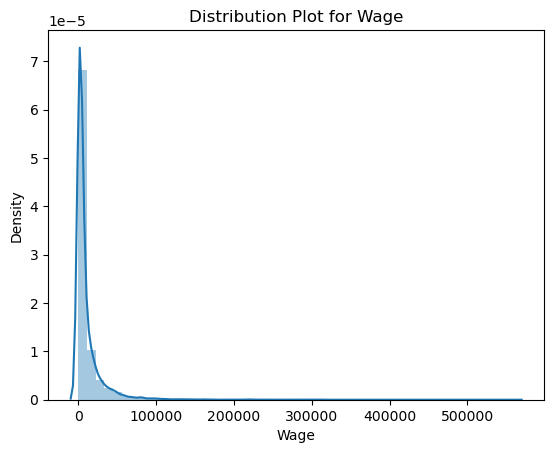

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


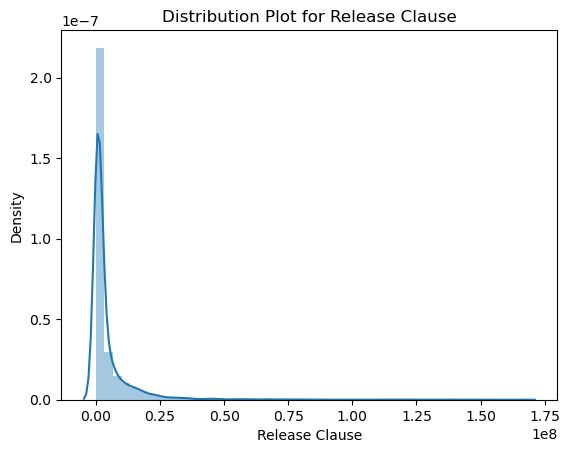

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


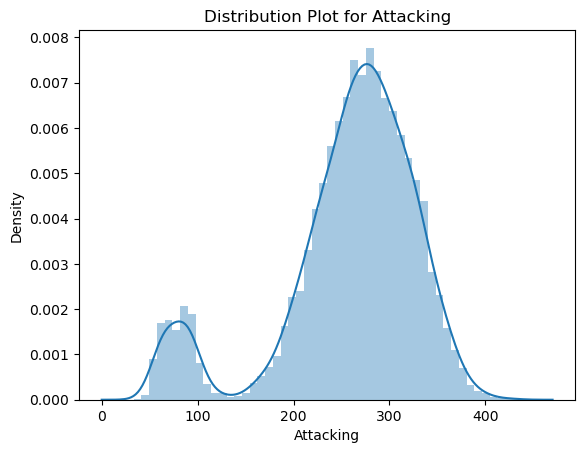

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


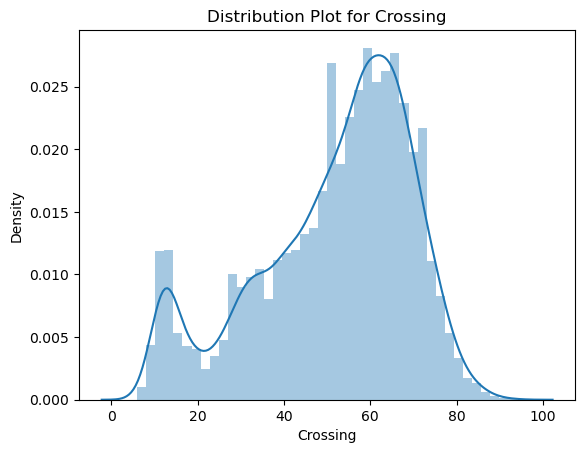

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


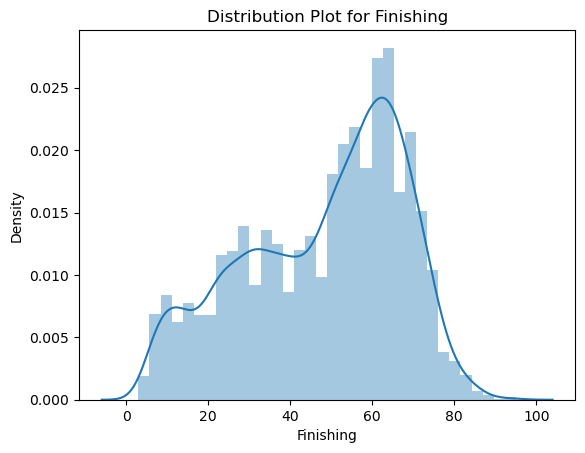

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


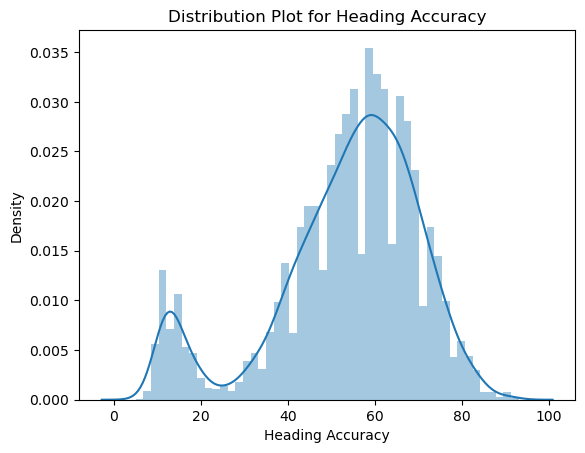

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


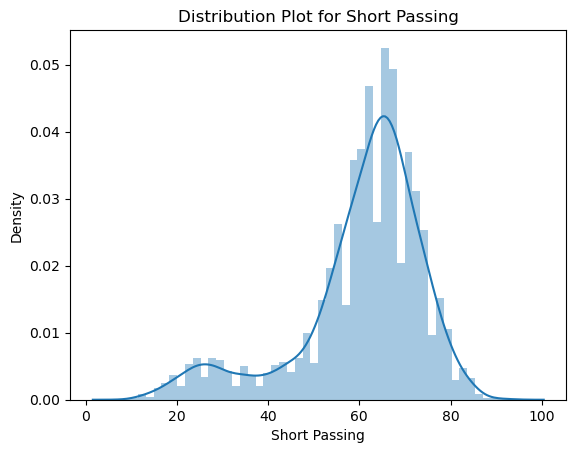

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


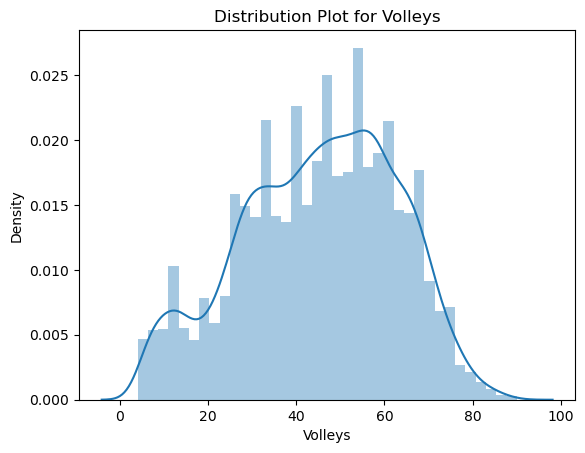

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


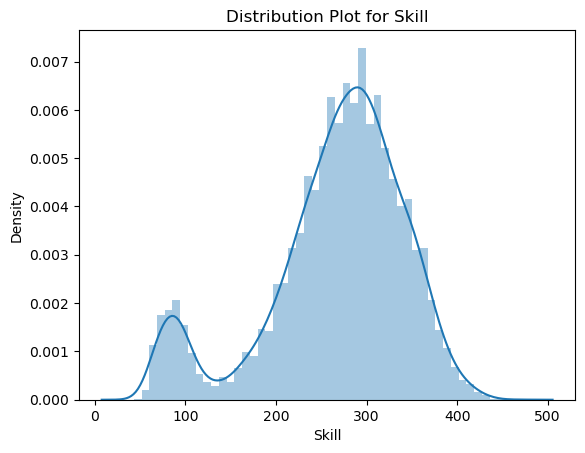

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


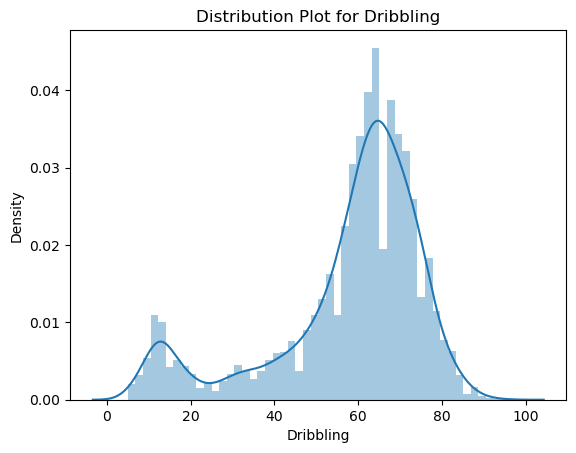

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


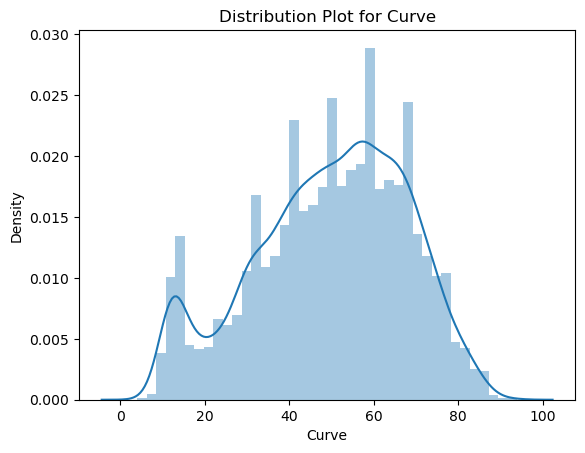

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


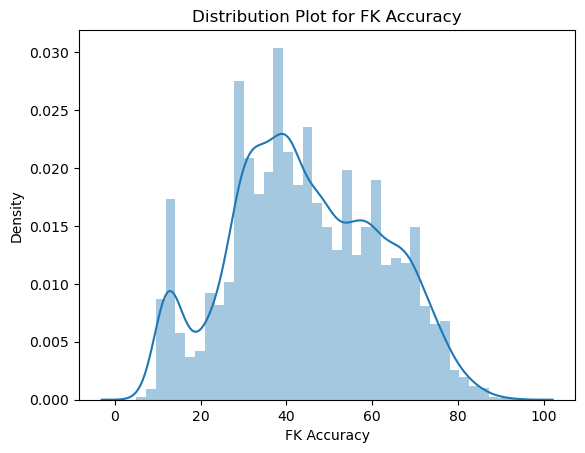

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


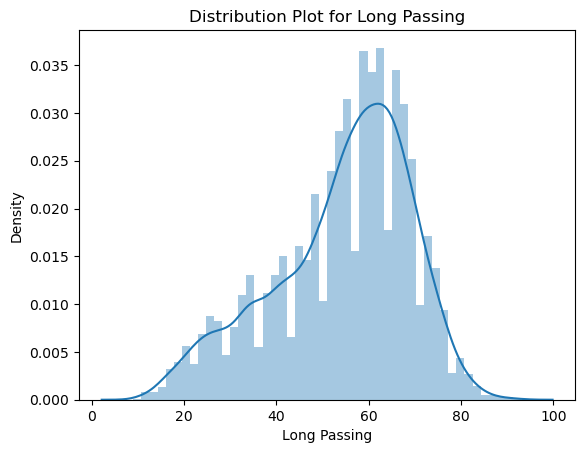

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


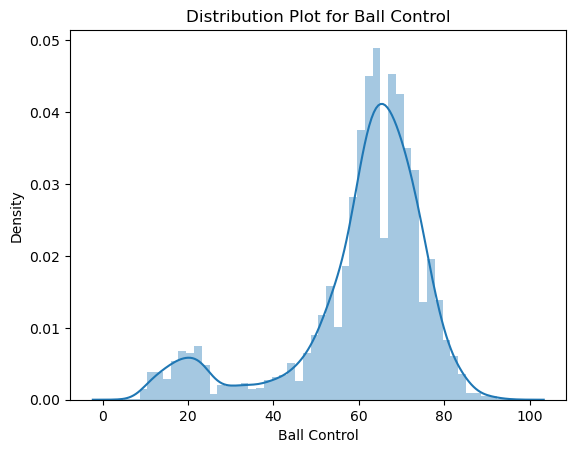

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


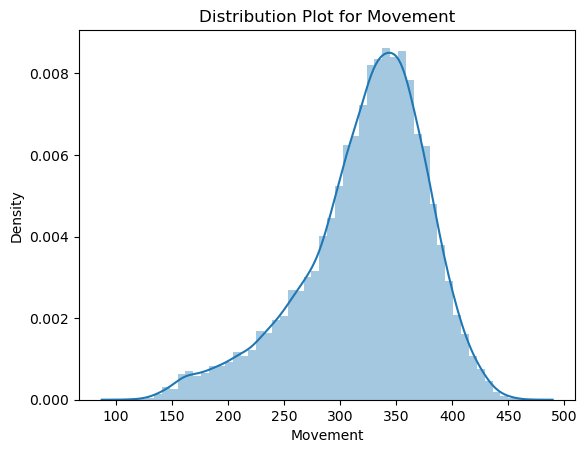

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


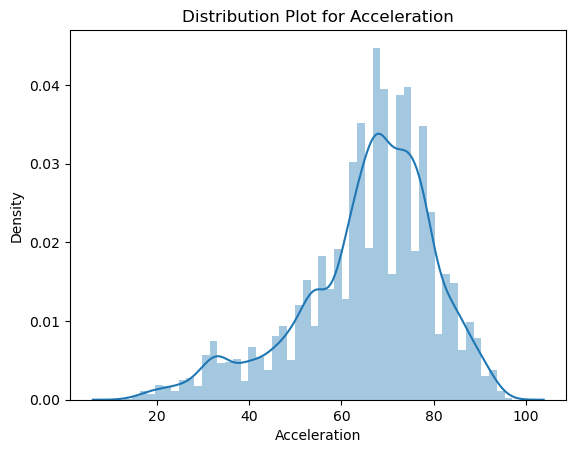

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


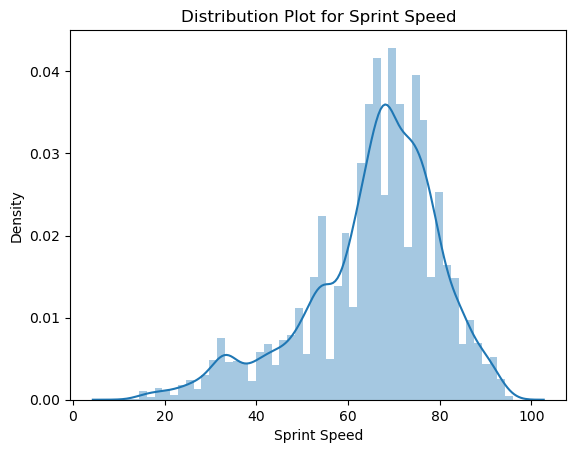

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


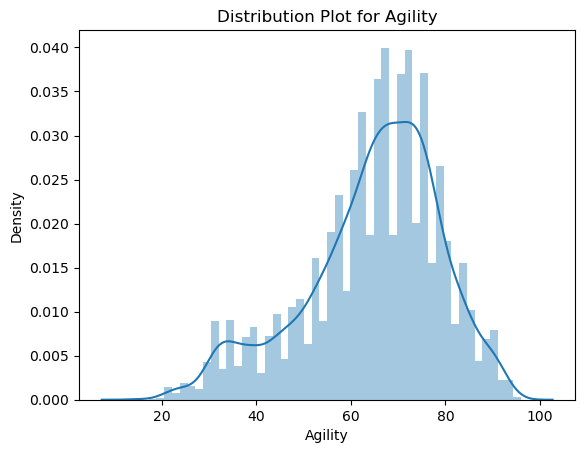

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


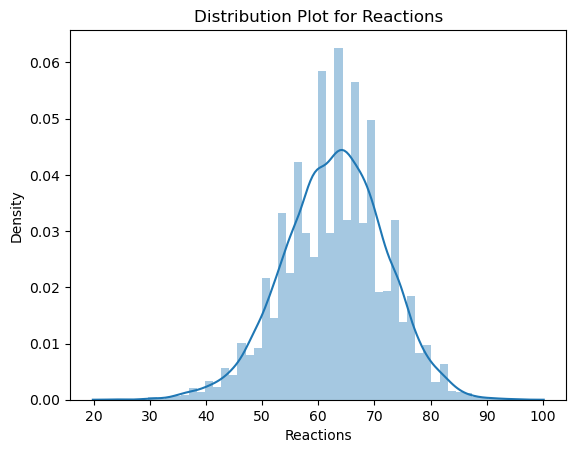

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


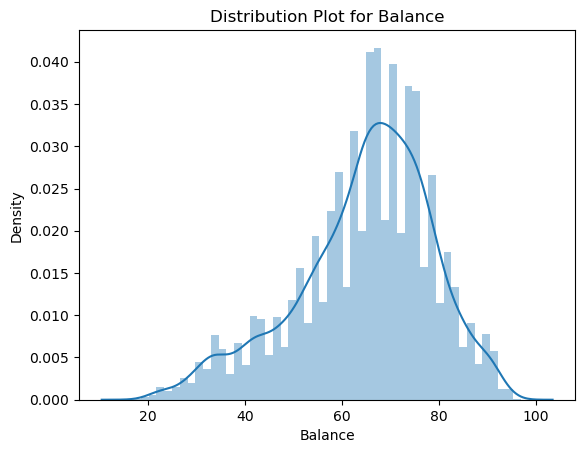

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


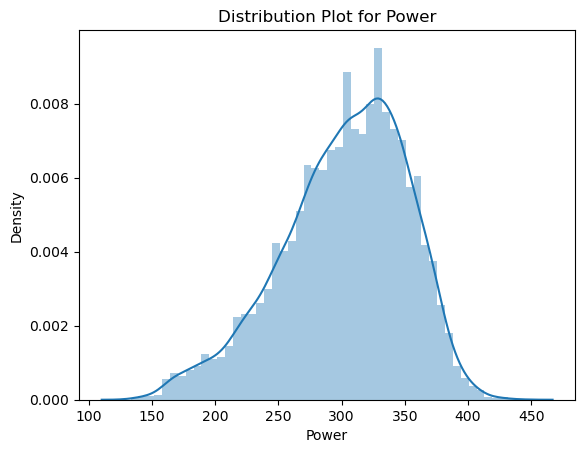

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


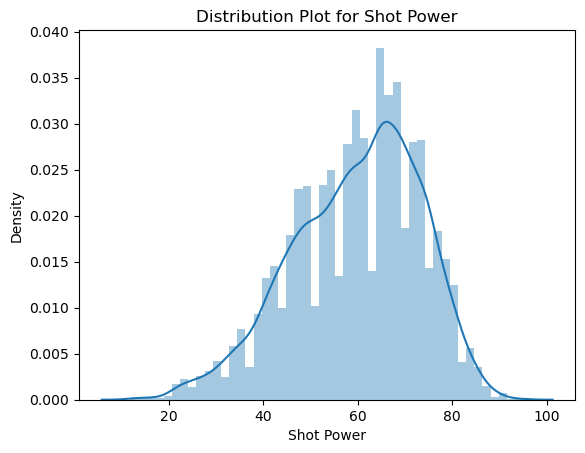

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


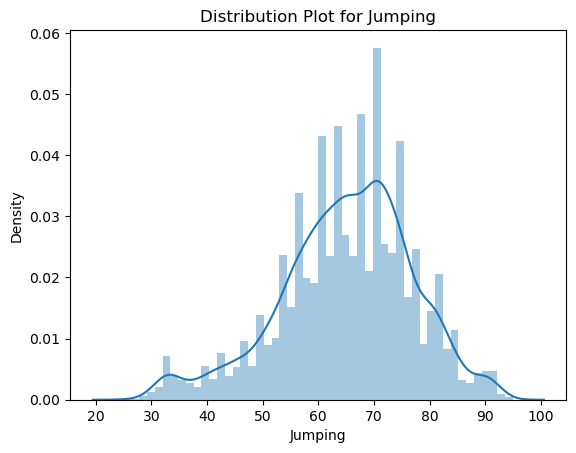

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


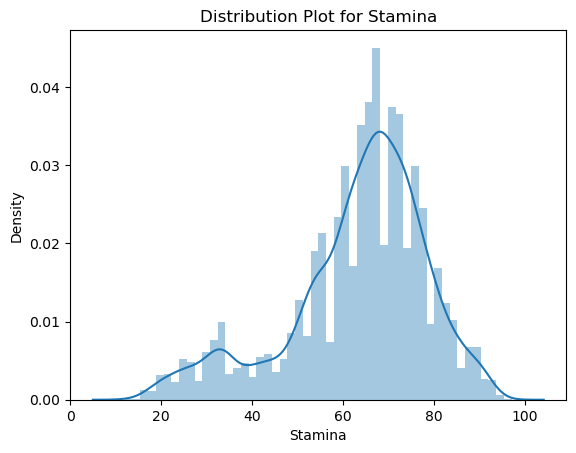

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


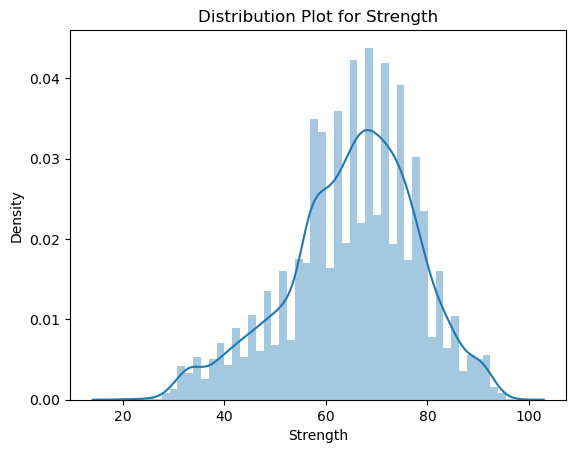

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


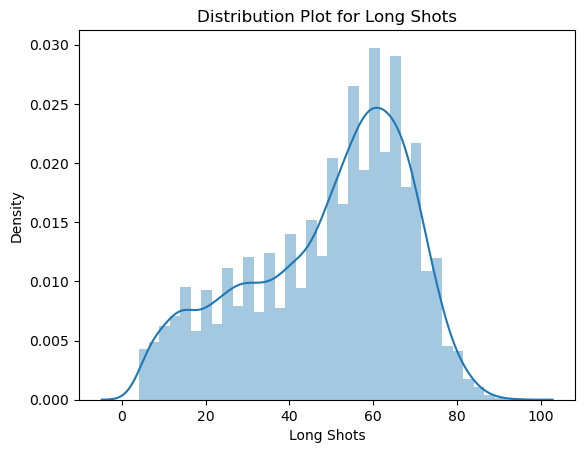

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


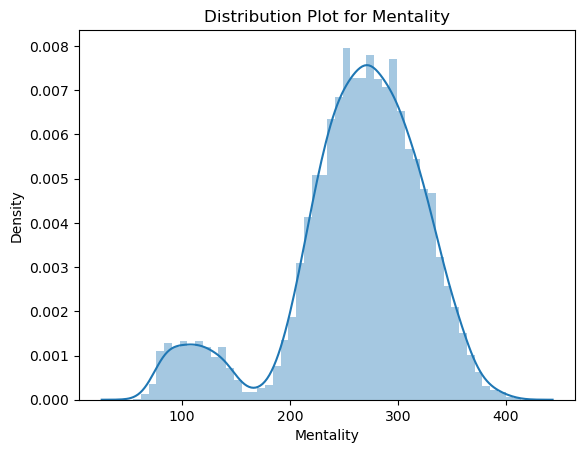

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


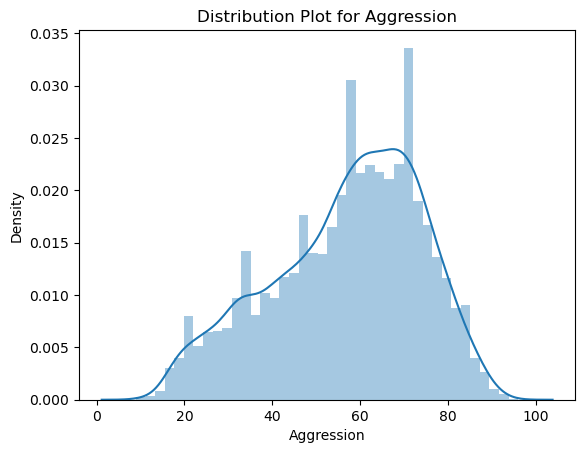

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


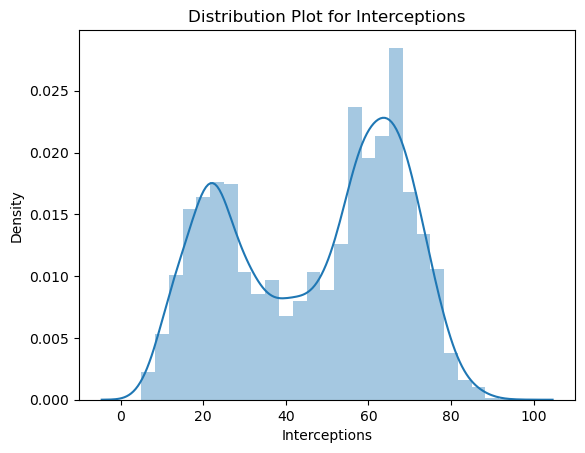

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


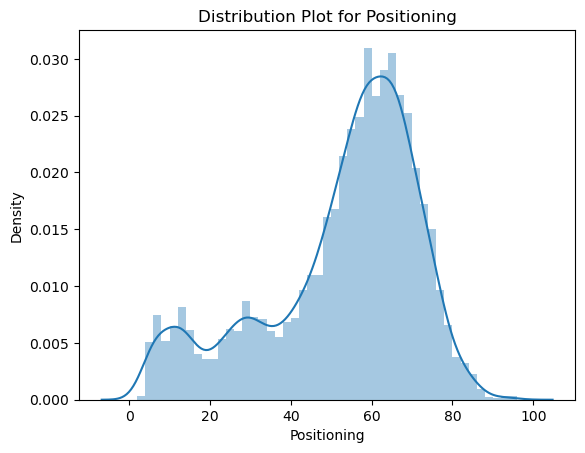

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


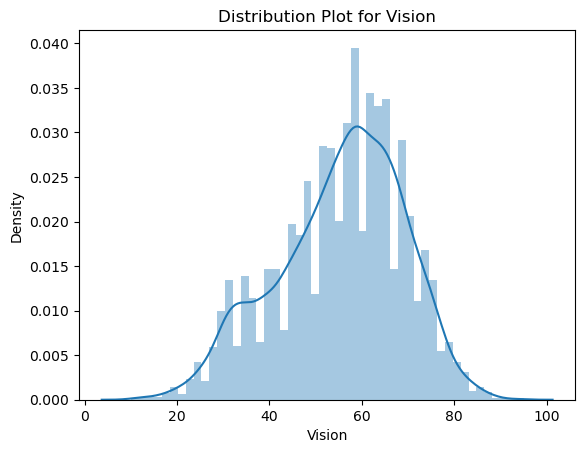

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


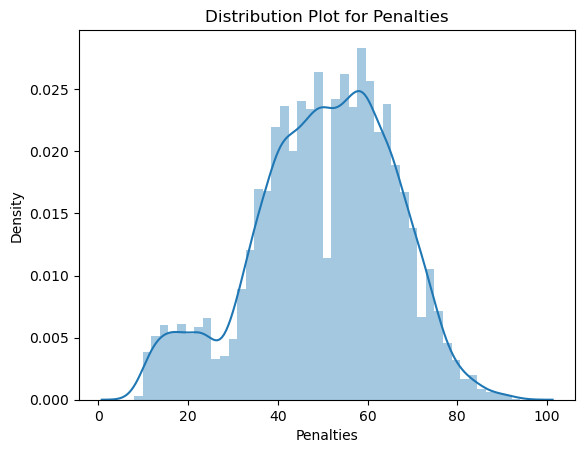

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


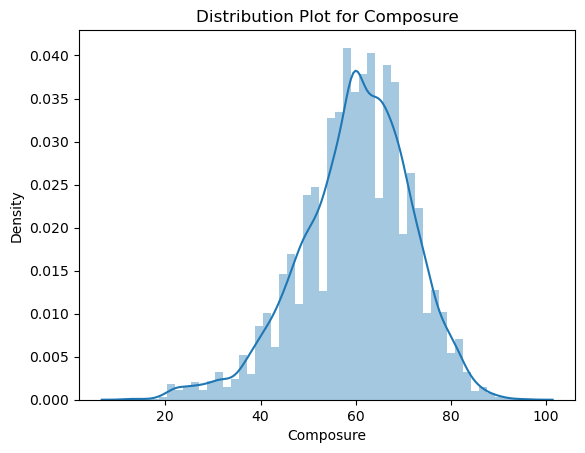

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


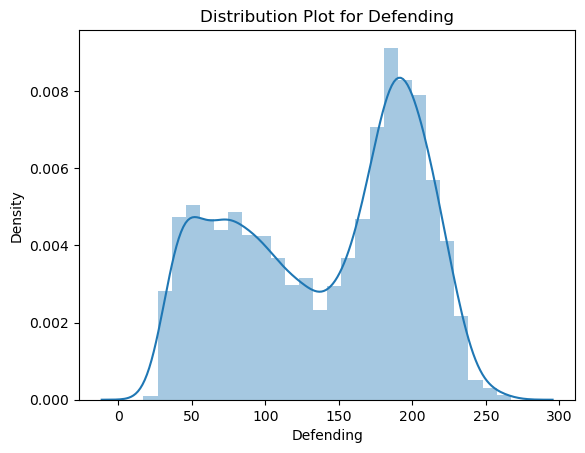

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


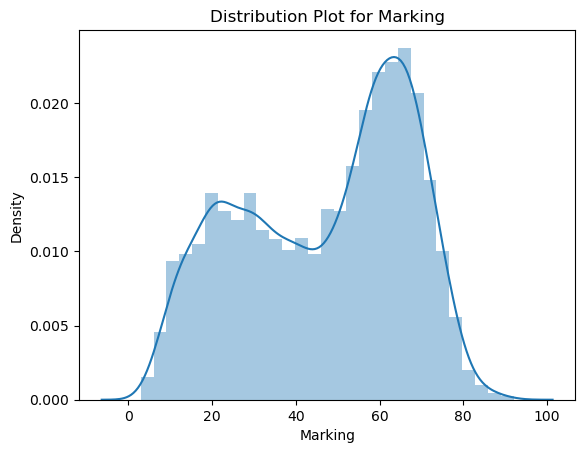

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


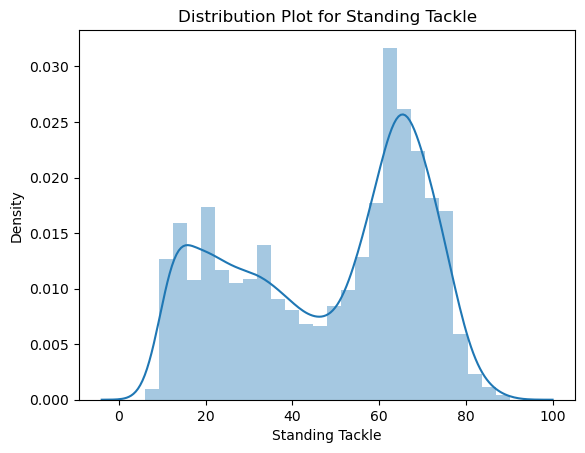

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


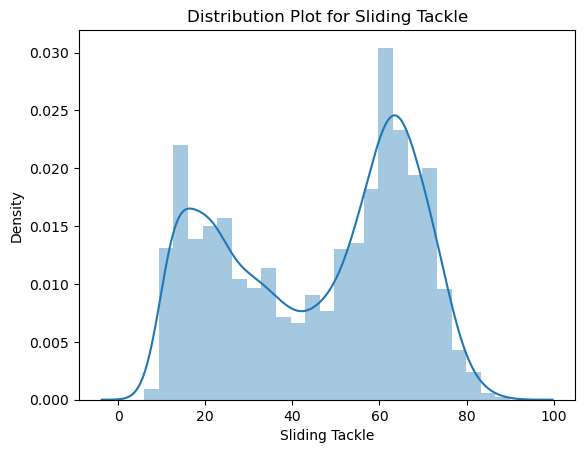

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


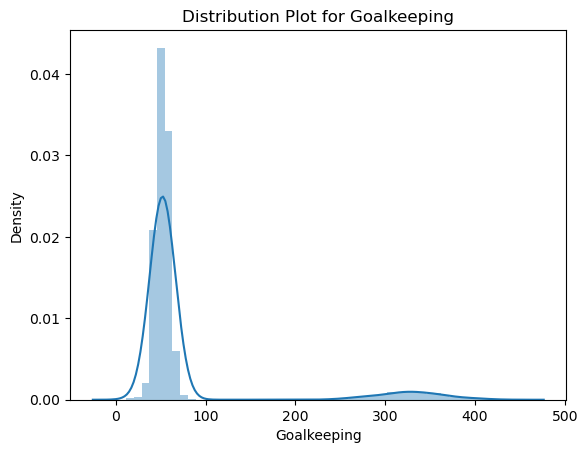

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


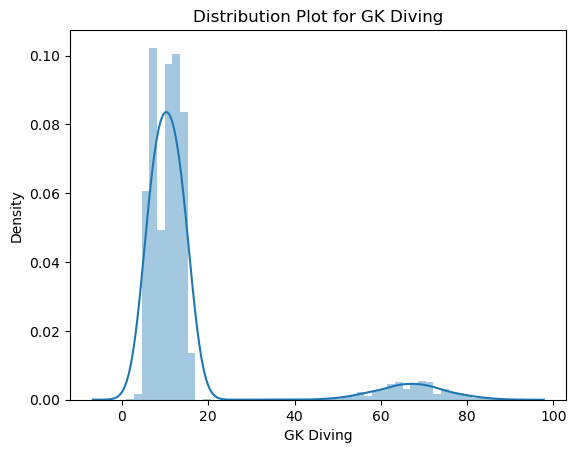

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


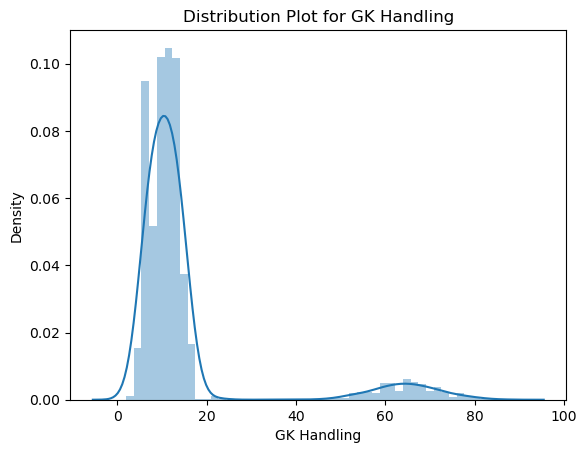

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


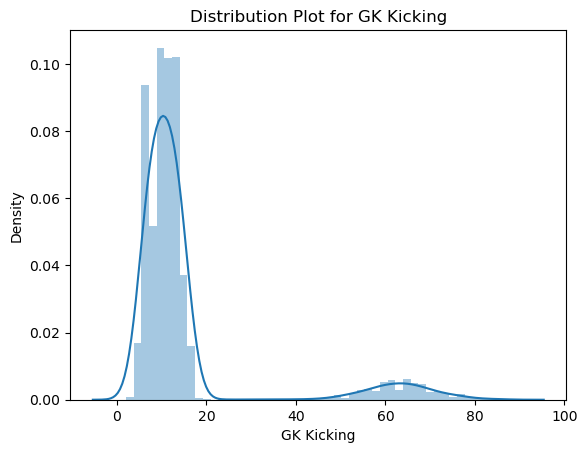

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


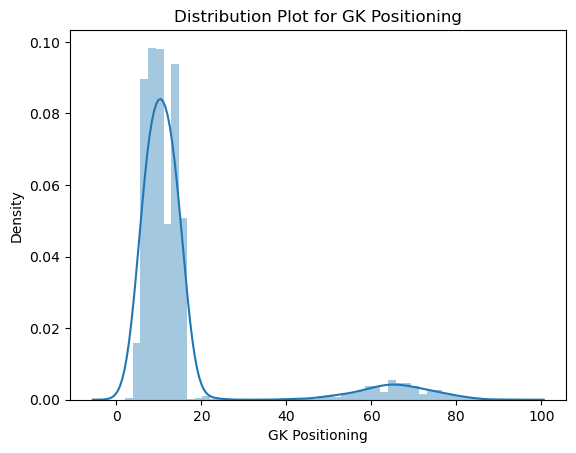

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


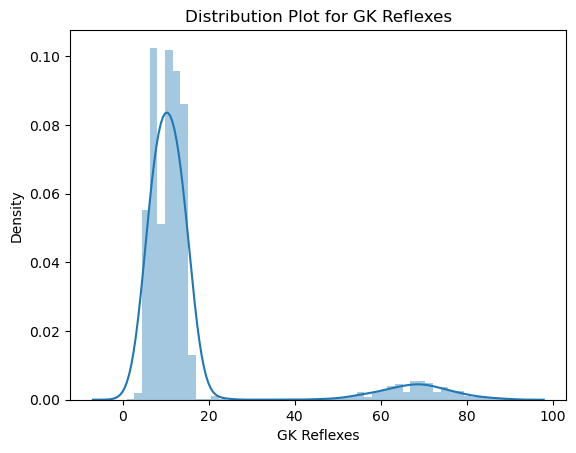

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


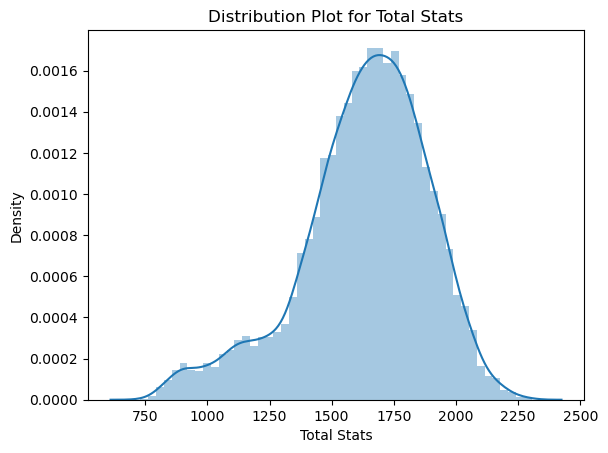

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


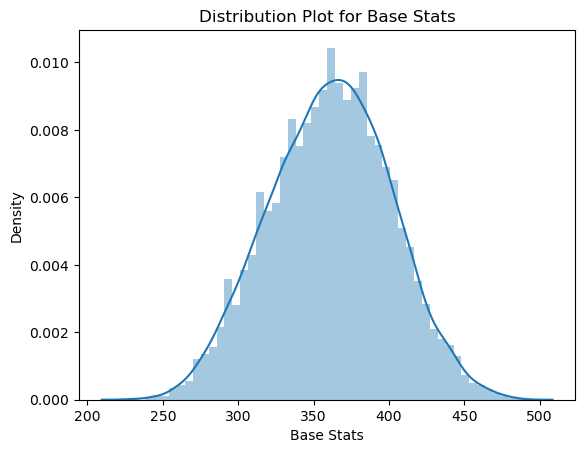

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


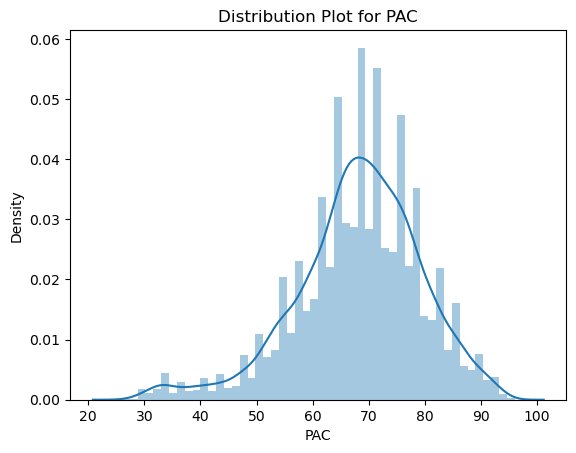

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


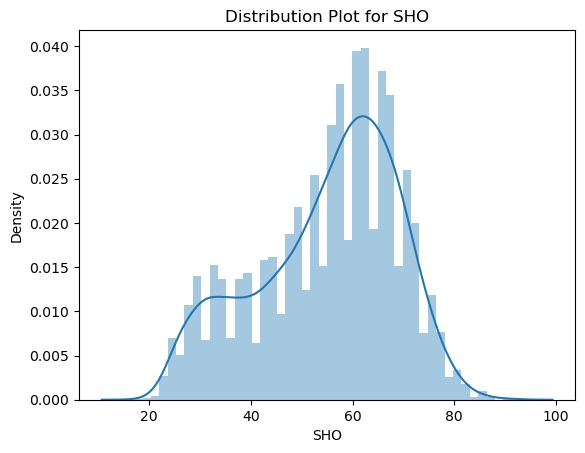

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


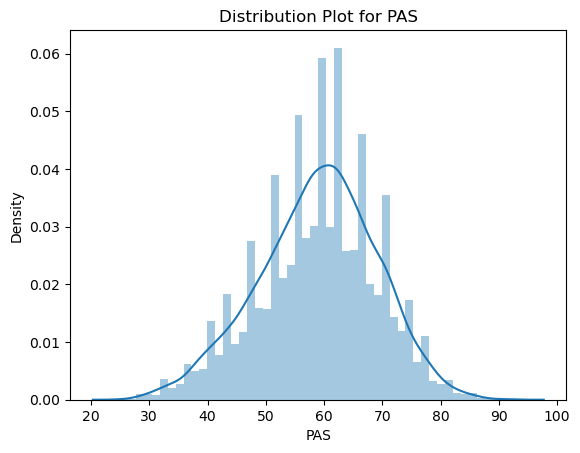

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


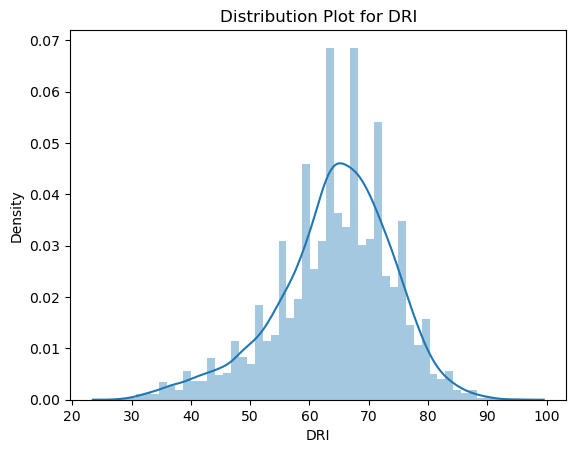

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


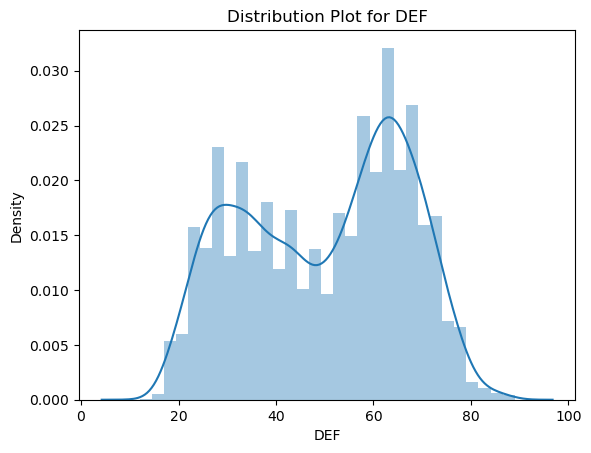

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


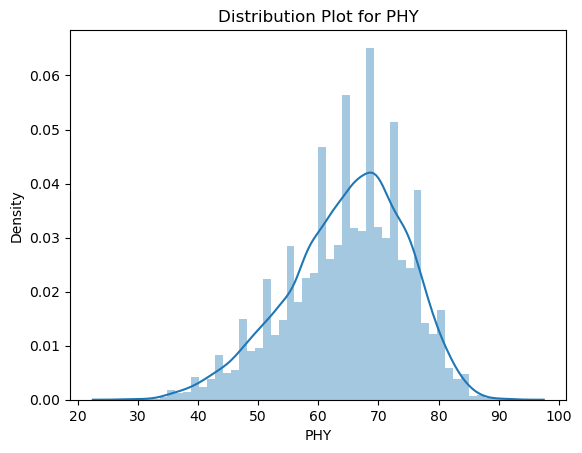

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


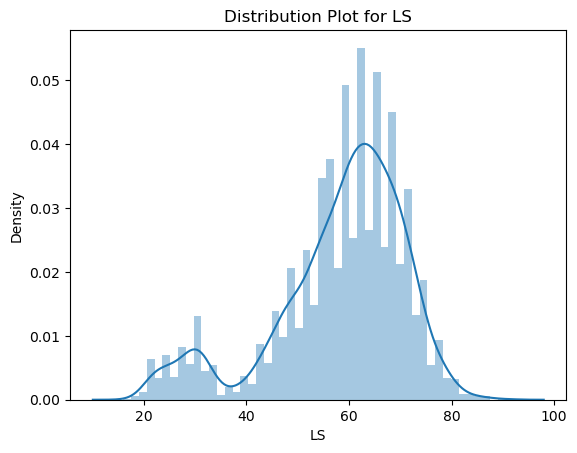

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


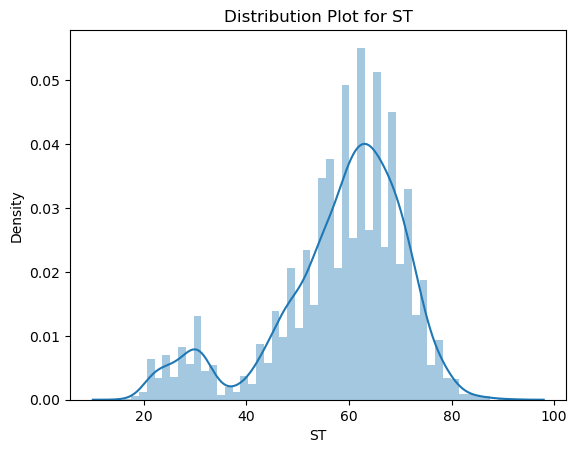

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


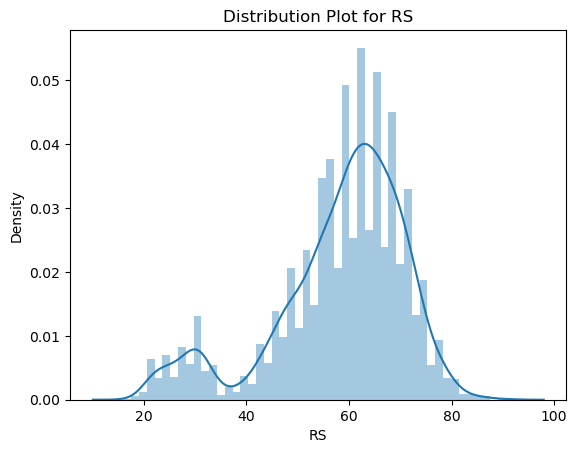

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


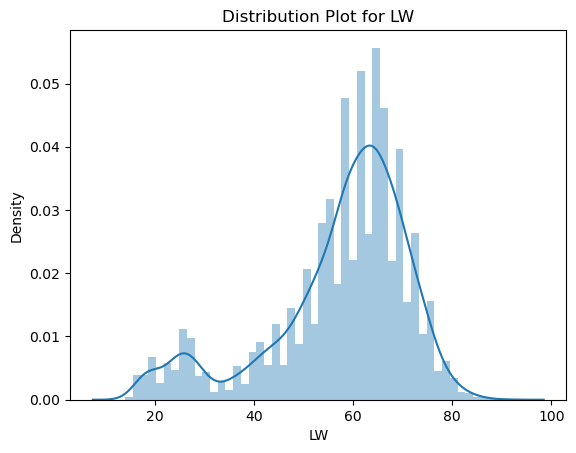

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


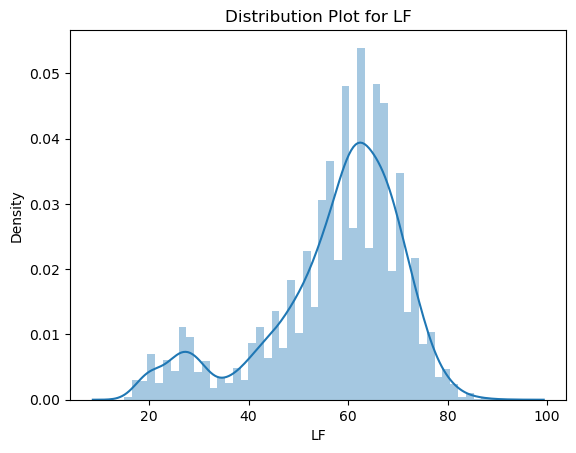

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


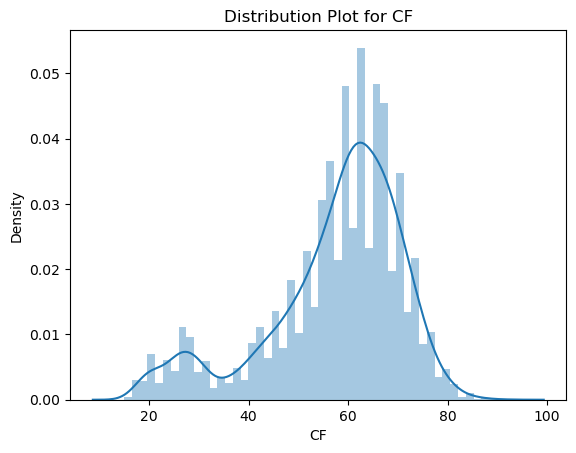

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


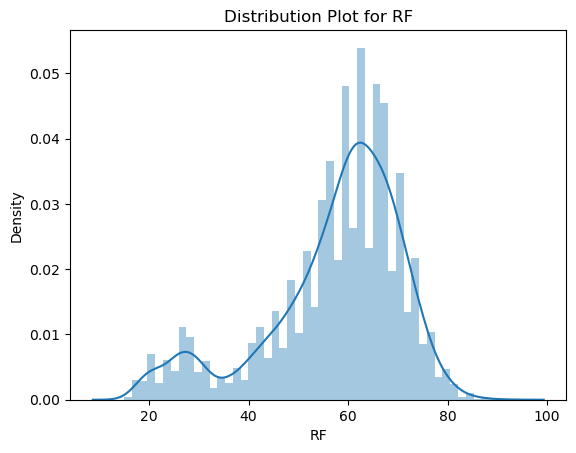

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


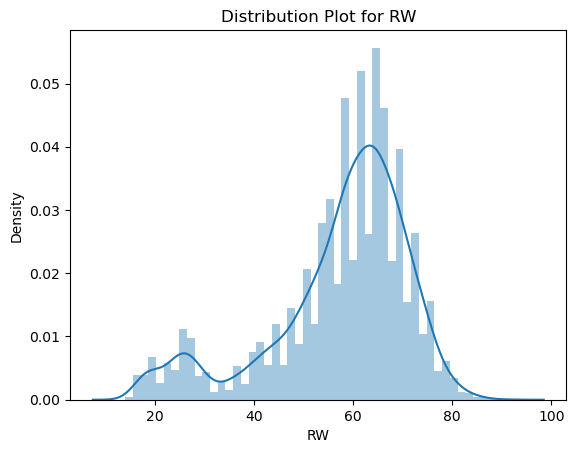

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


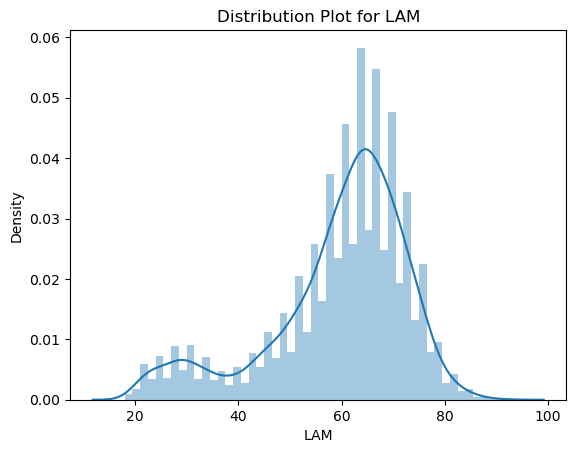

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


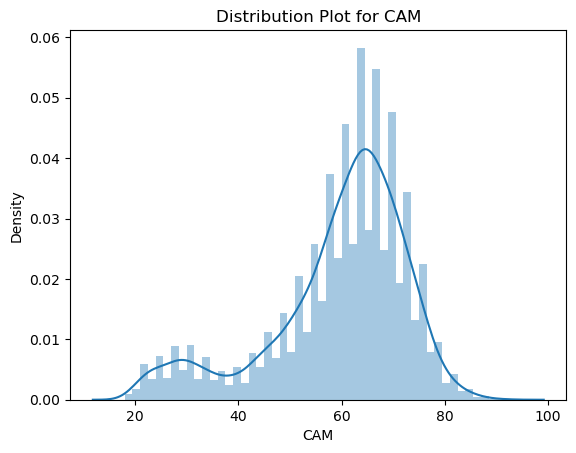

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


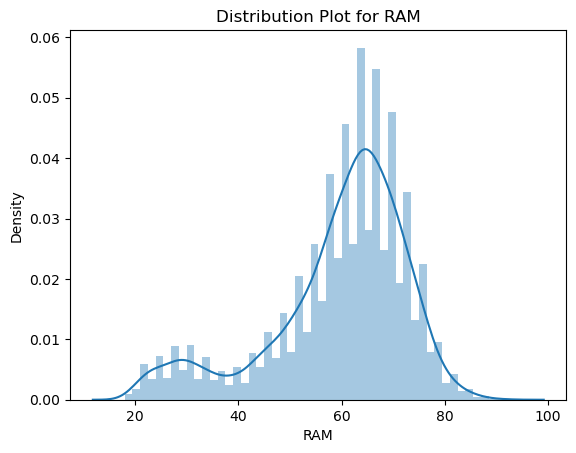

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


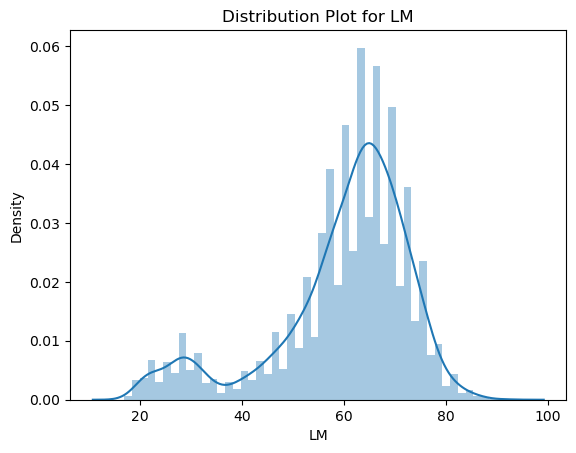

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


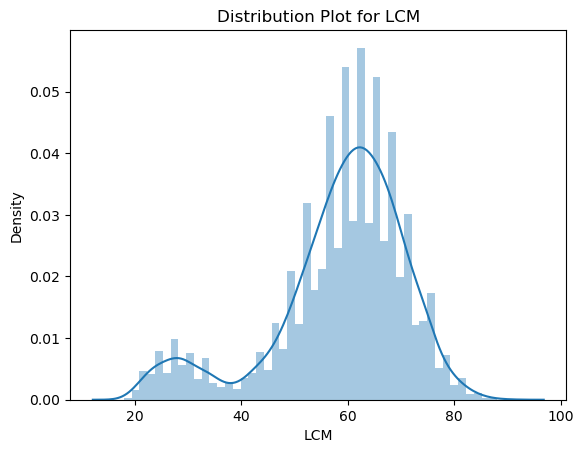

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


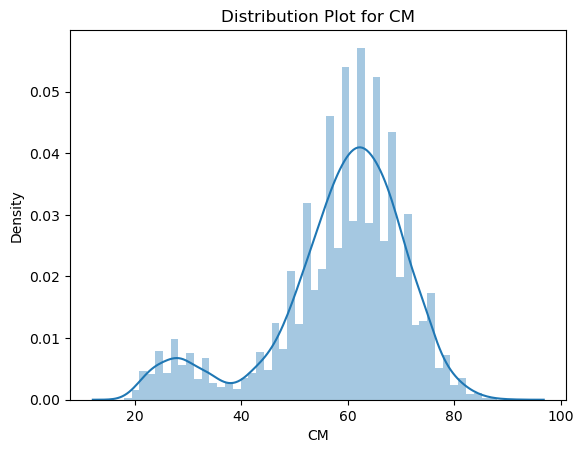

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


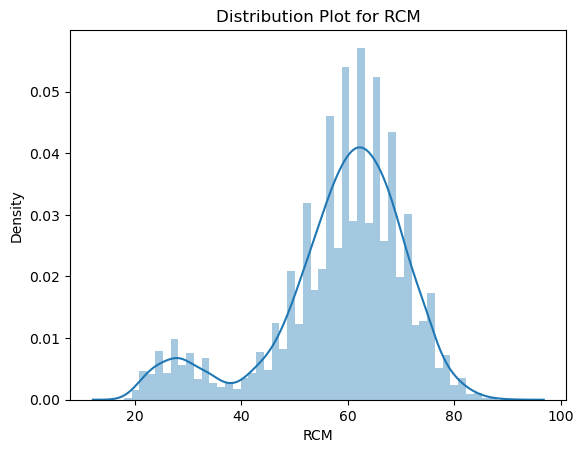

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


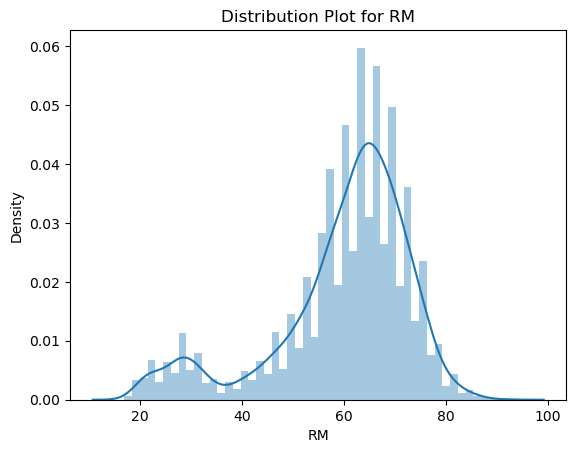

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


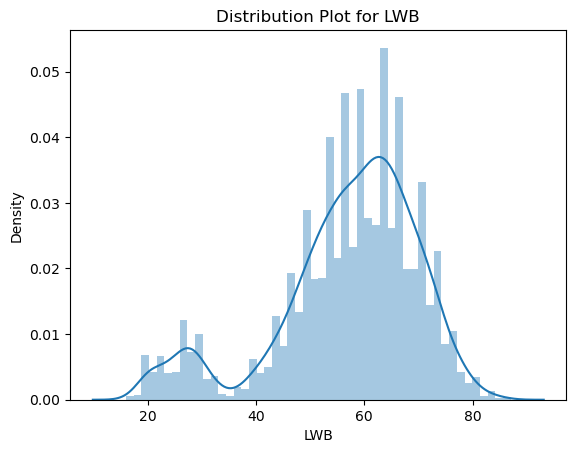

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


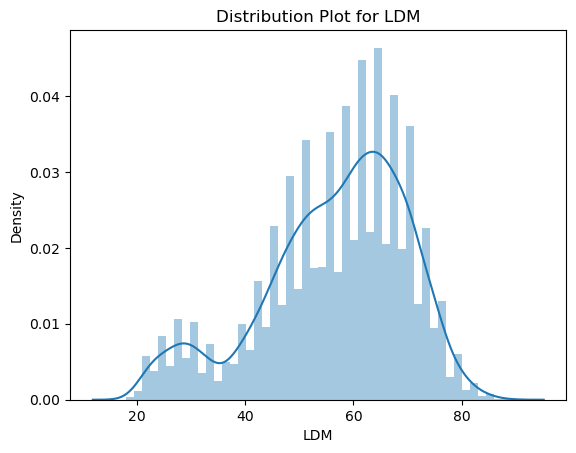

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


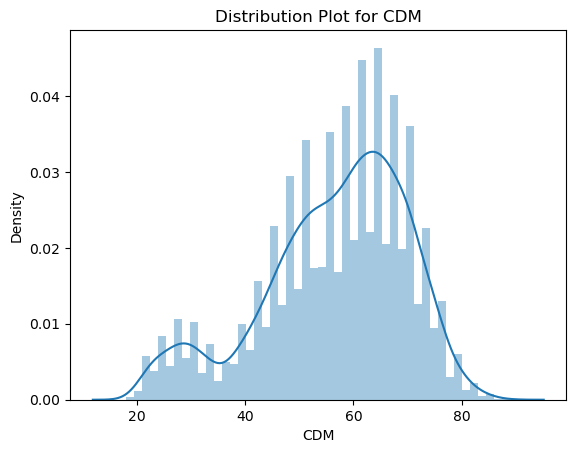

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


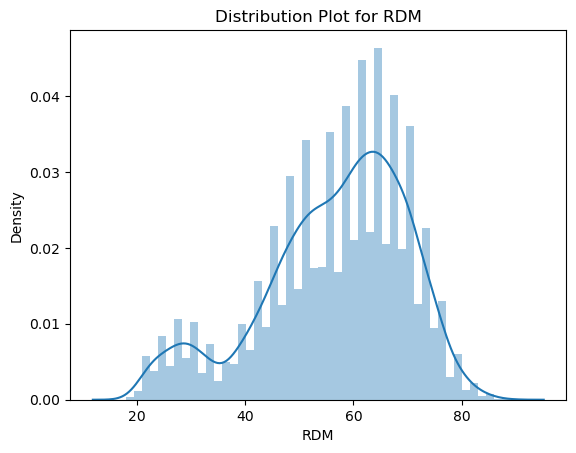

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


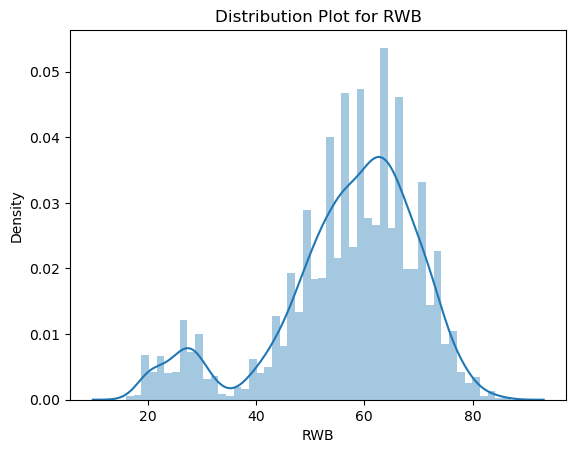

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


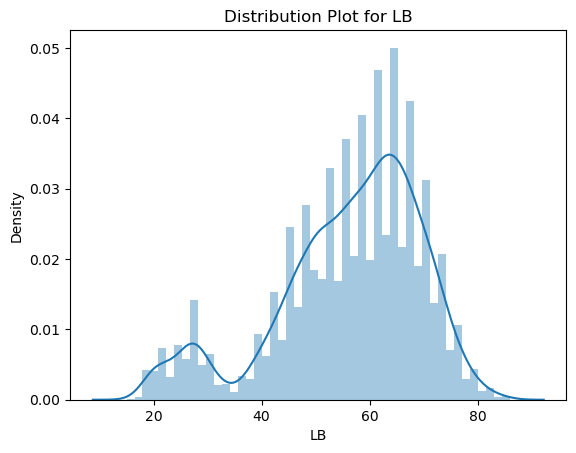

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


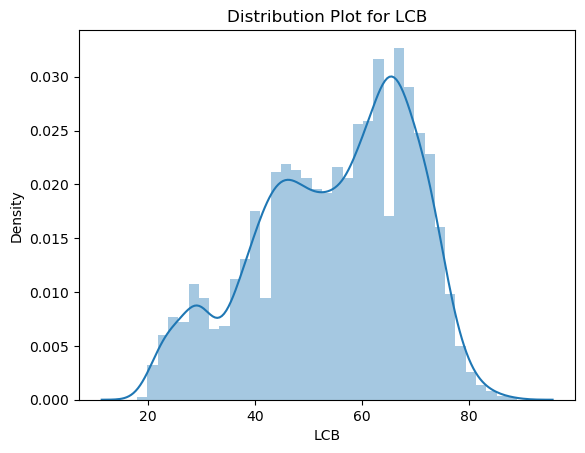

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


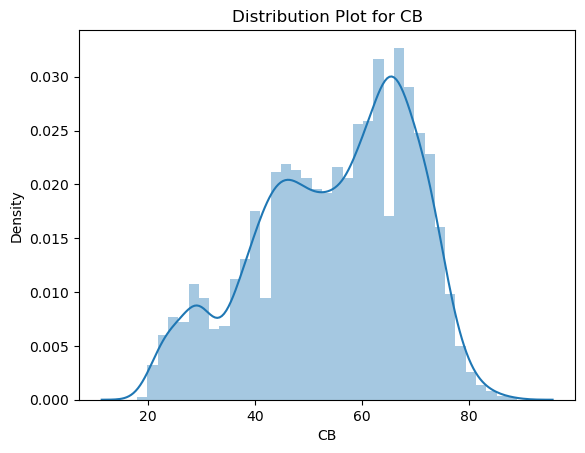

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


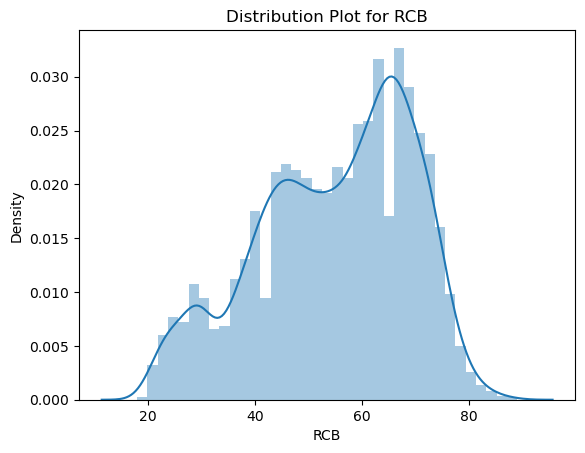

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


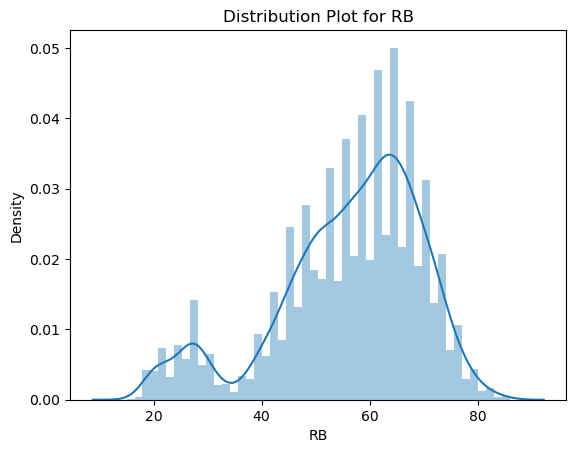

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


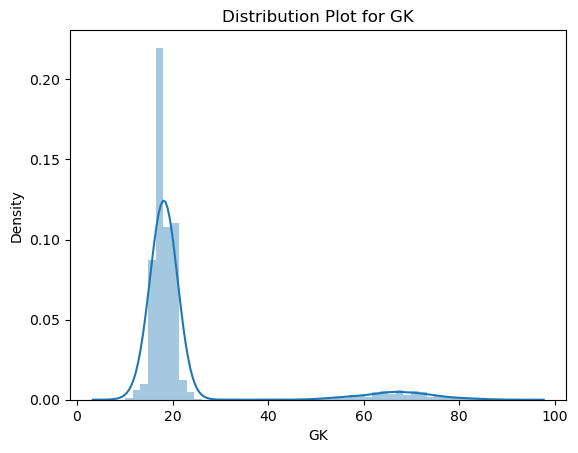

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


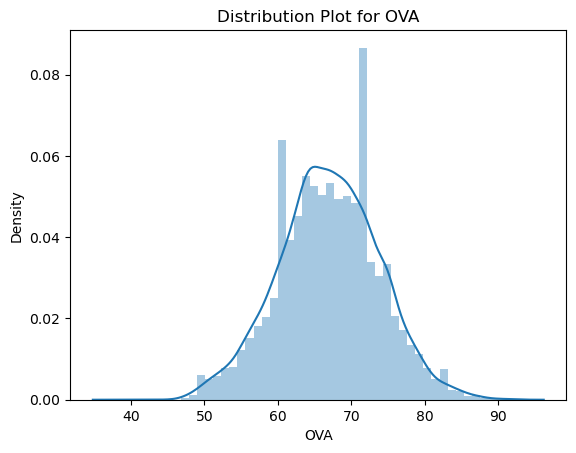

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


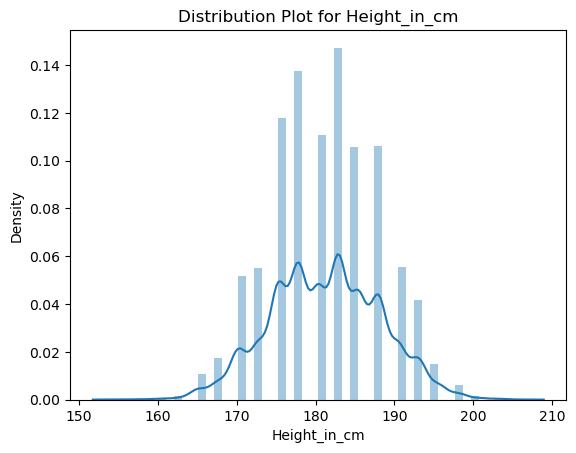

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


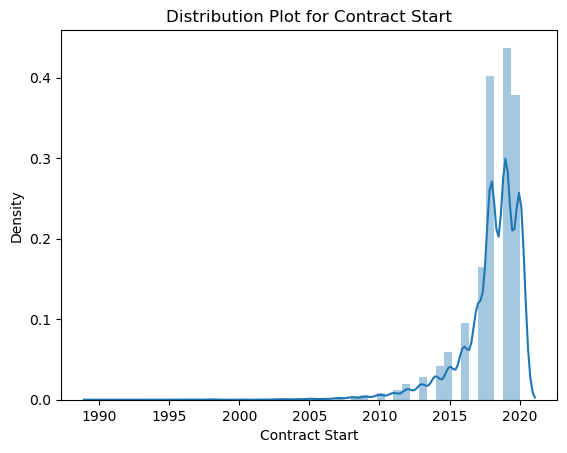

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/3971002770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


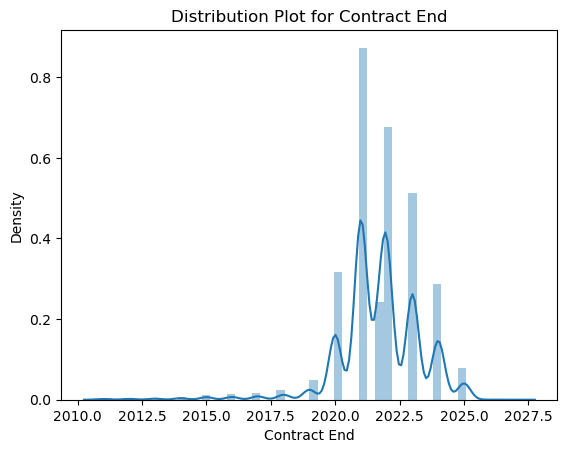

In [25]:
for col in numerical_columns:
    sns.distplot(data[col].dropna())
    plt.title(f'Distribution Plot for {col}')
    plt.show()

In [26]:
correlations_matrix = data.corr()

/var/folders/ph/whcjxjz51rl8p5yk1zr3jlqw0000gn/T/ipykernel_51367/438559354.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = data.corr()


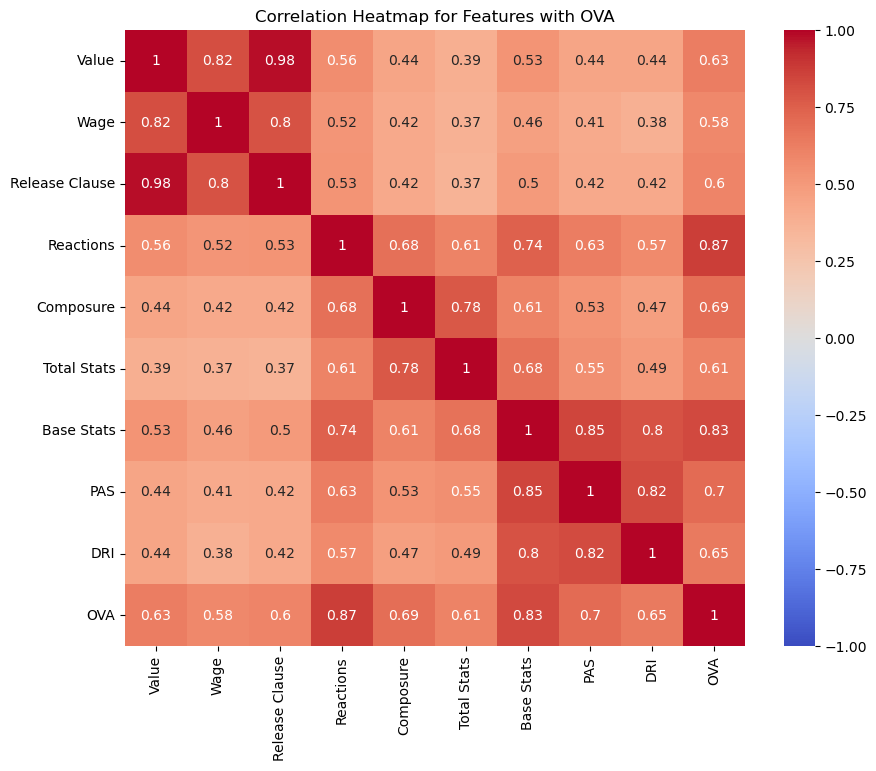

In [27]:
corr_ova = correlations_matrix.loc['OVA']
corr_ova_filtered = corr_ova[corr_ova > 0.55]
selected_features = corr_ova_filtered.index.tolist()
correlations_subset = correlations_matrix.loc[selected_features, selected_features]
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Features with OVA')
plt.show()

# Data Modeling

In [28]:
y = data['OVA']
X = data.drop(['OVA', 'Total Stats', 'Base Stats'], axis=1)

In [29]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [30]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,ID,Age,Weight(kg),Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,PAC,SHO,PAS,DRI,DEF,PHY,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Height_in_cm,Contract Start,Contract End
0,0.609875,0.629630,0.333333,0.037037,0.750000,1.000000,0.831231,0.980198,0.897727,1.000000,0.738636,0.965116,0.976744,1.000000,1.000000,0.988889,1.000000,0.976190,1.000000,0.962963,0.928571,0.811765,0.939024,0.972222,0.9750,0.823151,0.891566,0.614286,0.705882,0.636364,1.000000,0.813370,0.402299,0.388889,0.968085,1.000000,0.779070,1.000000,0.296,0.325843,0.345238,0.214286,0.098361,0.056180,0.104651,0.151163,0.131868,0.078652,0.842857,0.986842,0.970588,1.000000,0.337662,0.575758,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.986301,0.986301,0.986301,1.000000,0.746479,0.704225,0.704225,0.704225,0.746479,0.704225,0.521127,0.521127,0.521127,0.704225,0.148148,0.30,0.466667,0.6250
1,0.080189,0.703704,0.523810,0.037037,0.511111,0.392857,0.455856,1.000000,0.886364,1.000000,0.965909,0.860465,0.953488,0.868852,0.912088,0.855556,0.797753,0.809524,0.956044,0.905983,0.880952,0.941176,0.890244,0.986111,0.6750,1.000000,0.987952,1.000000,0.847059,0.753247,0.988889,0.830084,0.620690,0.266667,0.989362,0.847059,0.883721,0.988095,0.268,0.280899,0.309524,0.214286,0.107728,0.067416,0.104651,0.151163,0.131868,0.112360,0.900000,1.000000,0.823529,0.910448,0.298701,0.757576,1.000000,1.000000,1.000000,0.961538,0.974359,0.974359,0.974359,0.961538,0.973333,0.973333,0.973333,0.973684,0.904110,0.904110,0.904110,0.973684,0.732394,0.647887,0.647887,0.647887,0.732394,0.690141,0.549296,0.549296,0.549296,0.690141,0.160494,0.65,0.933333,0.6875
2,0.727692,0.555556,0.468254,0.037037,0.888889,0.428571,0.792793,0.965347,0.738636,0.989130,0.909091,0.883721,0.988372,0.852459,0.879121,0.833333,0.898876,0.726190,0.912088,0.837607,0.761905,0.788235,0.768293,0.958333,0.8125,0.922830,0.927711,0.842857,0.752941,0.857143,0.900000,0.935933,0.827586,0.488889,0.978723,0.811765,0.930233,0.904762,0.316,0.359551,0.428571,0.154762,0.091335,0.157303,0.046512,0.116279,0.065934,0.101124,0.742857,0.973684,0.779412,0.850746,0.402597,0.833333,0.986842,0.986842,0.986842,0.910256,0.923077,0.923077,0.923077,0.910256,0.933333,0.933333,0.933333,0.907895,0.876712,0.876712,0.876712,0.907895,0.718310,0.704225,0.704225,0.704225,0.718310,0.690141,0.633803,0.633803,0.633803,0.690141,0.148148,0.55,0.800000,0.7500
3,0.736670,0.444444,0.261905,0.037037,1.000000,0.482143,1.000000,0.928218,0.897727,0.913043,0.647727,0.918605,0.965116,0.948478,0.989011,0.933333,0.943820,0.857143,0.989011,0.968661,0.964286,0.917647,1.000000,0.930556,0.8250,0.720257,0.819277,0.528571,0.811765,0.389610,0.888889,0.838440,0.482759,0.344444,0.904255,0.941176,0.976744,0.964286,0.308,0.359551,0.285714,0.273810,0.110070,0.089888,0.081395,0.151163,0.142857,0.112360,0.928571,0.894737,0.897059,0.985075,0.311688,0.484848,0.934211,0.934211,0.934211,0.974359,0.948718,0.948718,0.948718,0.974359,0.973333,0.973333,0.973333,0.973684,0.931507,0.931507,0.931507,0.973684,0.760563,0.661972,0.661972,0.661972,0.760563,0.704225,0.478873,0.478873,0.478873,0.704225,0.160494,0.40,0.900000,0.6875
4,0.744830,0.481481,0.293651,0.037037,0.966667,0.660714,0.966967,0.925743,1.000000,0.858696,0.568182,1.000000,0.906977,0.932084,0.912088,0.900000,0.876404,1.000000,0.956044,0.811966,0.761905,0.764706,0.780488,0.930556,0.7375,0.884244,0.951807,0.542857,0.905882,0.701299,0.966667,0.983287,0.770115,0.677778,0.914894,0.988235,0.883721,0.940476,0.676,0.730337,0.702381

<class 'pandas.core.frame.DataFrame'>


In [31]:
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11701.0,0.846935,0.144675,0.0,0.787581,0.884005,0.942431,1.0
Age,11701.0,0.343351,0.183616,0.0,0.185185,0.333333,0.481481,1.0
Weight(kg),11701.0,0.385575,0.125621,0.0,0.293651,0.380952,0.468254,1.0
Growth,11701.0,0.242024,0.215219,0.0,0.037037,0.185185,0.407407,1.0
Value,11701.0,0.028264,0.058528,0.0,0.004167,0.008889,0.026667,1.0
...,...,...,...,...,...,...,...,...
RB,11701.0,0.579906,0.190631,0.0,0.478873,0.619718,0.718310,1.0
GK,11701.0,0.156395,0.179317,0.0,0.086420,0.098765,0.123457,1.0
Height_in_cm,11701.0,0.517426,0.136094,0.0,0.400000,0.500000,0.600000,1.0
Contract Start,11701.0,0.929998,0.078561,0.0,0.900000,0.933333,0.966667,1.0


In [32]:
columns_to_drop = ['Name', 'Nationality', 'Joined', 'Loan Date End', 'Hits', 'Club', 'BP', 'Position', 'W/F', 'SM', 'IR']
X_cat.drop(columns=columns_to_drop, inplace=True)
X_cat.drop

<bound method DataFrame.drop of         Foot     A/W     D/W
5291    Left  Medium     Low
8048   Right    High     Low
2219   Right    High  Medium
4782   Right    High  Medium
9219   Right    High    High
...      ...     ...     ...
8671   Right     Low     Low
8351   Right  Medium  Medium
11392  Right  Medium  Medium
1925   Right     NaN     NaN
9590   Right     NaN     NaN

[11701 rows x 3 columns]>

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)
X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(), columns=encoder.get_feature_names_out(input_features=X_cat.columns))
X_cat_encoded = pd.concat([X_cat, X_cat_encode], axis=1)
display(X_cat_encoded)

,Foot,A/W,D/W,Foot_Right,A/W_Low,A/W_Medium,A/W_nan,D/W_Low,D/W_Medium,D/W_nan
5291,Left,Medium,Low,1.0,1.0,0.0,0.0,0.0,1.0,0.0
8048,Right,High,Low,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2219,Right,High,Medium,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4782,Right,High,Medium,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9219,Right,High,High,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8671,Right,Low,Low,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8351,Right,Medium,Medium,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11392,Right,Medium,Medium,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1925,Right,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
columns_to_drop = ['Foot', 'A/W', 'D/W']
X_cat_encoded.drop(columns=columns_to_drop, inplace=True)

In [35]:
X = pd.concat([X_normalized, X_cat_encoded], axis=1)
X.head(5)

,ID,Age,Weight(kg),Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,PAC,SHO,PAS,DRI,DEF,PHY,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Height_in_cm,Contract Start,Contract End,Foot_Right,A/W_Low,A/W_Medium,A/W_nan,D/W_Low,D/W_Medium,D/W_nan
0,0.609875,0.629630,0.333333,0.037037,0.750000,1.000000,0.831231,0.980198,0.897727,1.000000,0.738636,0.965116,0.976744,1.000000,1.000000,0.988889,1.000000,0.976190,1.000000,0.962963,0.928571,0.811765,0.939024,0.972222,0.9750,0.823151,0.891566,0.614286,0.705882,0.636364,1.000000,0.813370,0.402299,0.388889,0.968085,1.000000,0.779070,1.000000,0.296,0.325843,0.345238,0.214286,0.098361,0.056180,0.104651,0.151163,0.131868,0.078652,0.842857,0.986842,0.970588,1.000000,0.337662,0.575758,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.986301,0.986301,0.986301,1.000000,0.746479,0.704225,0.704225,0.704225,0.746479,0.704225,0.521127,0.521127,0.521127,0.704225,0.148148,0.30,0.466667,0.6250,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.080189,0.703704,0.523810,0.037037,0.511111,0.392857,0.455856,1.000000,0.886364,1.000000,0.965909,0.860465,0.953488,0.868852,0.912088,0.855556,0.797753,0.809524,0.956044,0.905983,0.880952,0.941176,0.890244,0.986111,0.6750,1.000000,0.987952,1.000000,0.847059,0.753247,0.988889,0.830084,0.620690,0.266667,0.989362,0.847059,0.883721,0.988095,0.268,0.280899,0.309524,0.214286,0.107728,0.067416,0.104651,0.151163,0.131868,0.112360,0.900000,1.000000,0.823529,0.910448,0.298701,0.757576,1.000000,1.000000,1.000000,0.961538,0.974359,0.974359,0.974359,0.961538,0.973333,0.973333,0.973333,0.973684,0.904110,0.904110,0.904110,0.973684,0.732394,0.647887,0.647887,0.647887,0.732394,0.690141,0.549296,0.549296,0.549296,0.690141,0.160494,0.65,0.933333,0.6875,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.727692,0.555556,0.468254,0.037037,0.888889,0.428571,0.792793,0.965347,0.738636,0.989130,0.909091,0.883721,0.988372,0.852459,0.879121,0.833333,0.898876,0.726190,0.912088,0.837607,0.761905,0.788235,0.768293,0.958333,0.8125,0.922830,0.927711,0.842857,0.752941,0.857143,0.900000,0.935933,0.827586,0.488889,0.978723,0.811765,0.930233,0.904762,0.316,0.359551,0.428571,0.154762,0.091335,0.157303,0.046512,0.116279,0.065934,0.101124,0.742857,0.973684,0.779412,0.850746,0.402597,0.833333,0.986842,0.986842,0.986842,0.910256,0.923077,0.923077,0.923077,0.910256,0.933333,0.933333,0.933333,0.907895,0.876712,0.876712,0.876712,0.907895,0.718310,0.704225,0.704225,0.704225,0.718310,0.690141,0.633803,0.633803,0.633803,0.690141,0.148148,0.55,0.800000,0.7500,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.736670,0.444444,0.261905,0.037037,1.000000,0.482143,1.000000,0.928218,0.897727,0.913043,0.647727,0.918605,0.965116,0.948478,0.989011,0.933333,0.943820,0.857143,0.989011,0.968661,0.964286,0.917647,1.000000,0.930556,0.8250,0.720257,0.819277,0.528571,0.811765,0.389610,0.888889,0.838440,0.482759,0.344444,0.904255,0.941176,0.976744,0.964286,0.308,0.359551,0.285714,0.273810,0.110070,0.089888,0.081395,0.151163,0.142857,0.112360,0.928571,0.894737,0.897059,0.985075,0.311688,0.484848,0.934211,0.934211,0.934211,0.974359,0.948718,0.948718,0.948718,0.974359,0.973333,0.973333,0.973333,0.973684,0.931507,0.931507,0.931507,0.973684,0.760563,0.661972,0.661972,0.661972,0.760563,0.704225,0.478873,0.478873,0.478873,0.704225,0.160494,0.40,0.900000,0.6875,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.744830,0.481481,0.293651,0.037037,0.966667,0.660714,0.966967,0.925743,1.000000,0.858696,0.568182,1.000000,0.906977,0.932084,0.912088,0.900000,0.876404,1.000000,0.956044,0.811966,0.7619

# Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9360, 91)
(2341, 91)
(9360,)
(2341,)


In [38]:
X_train.head()

,ID,Age,Weight(kg),Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,PAC,SHO,PAS,DRI,DEF,PHY,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Height_in_cm,Contract Start,Contract End,Foot_Right,A/W_Low,A/W_Medium,A/W_nan,D/W_Low,D/W_Medium,D/W_nan
1775,0.862686,0.296296,0.365079,0.185185,0.077778,0.044643,0.082883,0.759901,0.647727,0.608696,0.806818,0.802326,0.709302,0.740047,0.736264,0.744444,0.741573,0.738095,0.758242,0.649573,0.642857,0.670588,0.658537,0.680556,0.6000,0.784566,0.722892,0.828571,0.776471,0.727273,0.711111,0.844011,0.781609,0.755556,0.776596,0.741176,0.604651,0.809524,0.808,0.786517,0.821429,0.773810,0.100703,0.134831,0.046512,0.104651,0.098901,0.146067,0.600000,0.631579,0.691176,0.656716,0.805195,0.757576,0.750000,0.750000,0.750000,0.717949,0.717949,0.717949,0.717949,0.717949,0.746667,0.746667,0.746667,0.736842,0.794521,0.794521,0.794521,0.736842,0.816901,0.816901,0.816901,0.816901,0.816901,0.830986,0.816901,0.816901,0.816901,0.830986,0.123457,0.55,0.933333,0.6250,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2455,0.893593,0.296296,0.333333,0.296296,0.047778,0.017857,0.043844,0.685644,0.772727,0.630435,0.534091,0.755814,0.534884,0.775176,0.791209,0.800000,0.786517,0.738095,0.769231,0.660969,0.642857,0.658824,0.658537,0.625000,0.7125,0.710611,0.686747,0.628571,0.705882,0.688312,0.744444,0.779944,0.689655,0.600000,0.670213,0.835294,0.616279,0.773810,0.720,0.674157,0.750000,0.702381,0.107728,0.089888,0.127907,0.104651,0.131868,0.112360,0.585714,0.618421,0.735294,0.701493,0.662338,0.681818,0.684211,0.684211,0.684211,0.730769,0.705128,0.705128,0.705128,0.730769,0.746667,0.746667,0.746667,0.750000,0.767123,0.767123,0.767123,0.750000,0.774648,0.746479,0.746479,0.746479,0.774648,0.760563,0.704225,0.704225,0.704225,0.760563,0.123457,0.50,0.966667,0.6250,1.0,0.0,0.0,0.0,0.0,1.0,0.0
93,0.809189,0.333333,0.404762,0.185185,0.438889,0.187500,0.409009,0.881188,0.784091,0.826087,0.875000,0.883721,0.755814,0.829040,0.846154,0.800000,0.786517,0.833333,0.879121,0.789174,0.809524,0.764706,0.756098,0.875000,0.6625,0.890675,0.807229,0.757143,0.835294,0.883117,0.866667,0.919220,0.827586,0.822222,0.861702,0.847059,0.604651,0.833333,0.844,0.797753,0.869048,0.821429,0.103044,0.134831,0.069767,0.151163,0.098901,0.089888,0.742857,0.802632,0.808824,0.805970,0.844156,0.878788,0.907895,0.907895,0.907895,0.871795,0.858974,0.858974,0.858974,0.871795,0.893333,0.893333,0.893333,0.894737,0.931507,0.931507,0.931507,0.894737,0.943662,0.929577,0.929577,0.929577,0.943662,0.943662,0.915493,0.915493,0.915493,0.943662,0.148148,0.65,0.933333,0.6875,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8952,0.751365,0.481481,0.642857,0.037037,0.002778,0.007143,0.002631,0.366337,0.329545,0.163043,0.636364,0.476744,0.162791,0.323185,0.362637,0.300000,0.213483,0.404762,0.439560,0.413105,0.488095,0.305882,0.609756,0.486111,0.3375,0.504823,0.277108,0.785714,0.705882,0.792208,0.200000,0.442897,0.632184,0.544444,0.138298,0.400000,0.337209,0.511905,0.688,0.595506,0.690476,0.750000,0.065574,0.078652,0.081395,0.046512,0.054945,0.101124,0.271429,0.078947,0.250000,0.238806,0.623377,0.727273,0.315789,0.315789,0.315789,0.320513,0.294872,0.294872,0.294872,0.320513,0.320000,0.320000,0.320000,0.355263,0.410959,0.410959,0.410959,0.355263,0.563380,0.563380,0.563380,0.563380,0.563380,0.605634,0.619718,0.619718,0.619718,0.605634,0.074074,0.70,1.000000,0.6875,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7810,0.791394,0.370370,0.293651,0.111111,0.006111,0.003571,0.005039,0.581683,0.590909,0.576087,0.375000,0.662791,0.546512,0.620609,0.681319,0.644444,0.617978,0.571429,0.626374,0.

In [39]:
y_train.head()

11313    74
7993     72
9995     84
2651     62
7603     64
Name: OVA, dtype: int64

In [40]:
from sklearn.linear_model import LinearRegression as linreg

In [41]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Model Validation

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9118682568274593

In [43]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.9033760961049967

In [44]:
r2 = r2_score(y_test, predictions_test)
r2

0.9033760961049967

In [45]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

4.642681257076011

In [46]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

2.1546882041437017

In [47]:
rmse/y_test.mean()

0.03214149224774847